# 6.6 ESA Task 6.6 Sourcing & analyzing time series data

## Table of Contents

#### 01. Import libraries and data

#### 02. Subsetting, smoothing, transforming, wrangling and cleaning time series data

> #### ASX200 : Raw, 50 SMA, 30 SMA, weekly (5-period) log returns, daily (1-period) log returns

> #### AUDJPY : Raw, 50 SMA, 30 SMA, weekly (5-period) log returns, daily (1-period) log returns

> #### Line plots

#### 03. Time series analysis: decomposition

> #### ASX200

> #### AUDJPY

#### 04. Testing for stationarity

> #### ASX200

> #### AUDJPY

#### 05. Stationarizing ASX200 stock market index and AUDJPY FX time series data

#### 06. Bonus Task: ARIMA forecasting

### 01. Import libraries and data

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles statistical models
import os
os.environ["OMP_NUM_THREADS"] = "1" # This only applies to this notebook session, to circumvent annoying Windows-constraint related warnings

import warnings # This is a library that handles warnings.
from statsmodels.tsa.stattools import adfuller # Imports the Augmented Dickey-Fuller Test for stationarity
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Imports autocorrelation and partial correlation function plotting functions
from datetime import datetime # Import a special function that allows a date variable to be converted to datetime, to re-set index to the latter
from pylab import rcParams # This will define a fixed size for all special charts, i.e. the time series decomposition charts

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or feature.
# These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [222]:
# Import ASX200 stock index (Australian stock market) and AUDJPY (Japanese Yen amount per 1 Australian Dollar) daily data
# The datasets also have exogenous shock flag columns with one descriptive column in case any plots with shock overlays would help the analysis

path = r'C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis\Data\Original Data'
asx200_raw = pd.read_excel(os.path.join(path, 'asx200_daily_shk.xlsx'))
audjpy_raw = pd.read_excel(os.path.join(path, 'audjpy_daily_shk.xlsx'))

### 02. Subsetting, smoothing, transforming, wrangling and cleaning time series data

In [31]:
# Check the dimensions
asx200_raw.shape

(5120, 9)

In [33]:
# Check the first 3 rows
asx200_raw.head(3)

timestamp  asx200_idx shock_name  no_shock_flag  gfc_flag  cpc_flag  \
0 2005-01-05   74.509804   No Shock           True     False     False   
1 2005-01-06   74.334569   No Shock           True     False     False   
2 2005-01-07   74.948813   No Shock           True     False     False   

   cov_19_flag  rus_ukr_war_flag  boj_int_rate_flag  
0        False             False              False  
1        False             False              False  
2        False             False              False

In [35]:
# Check the last 3 rows
asx200_raw.tail(3)

timestamp  asx200_idx               shock_name  no_shock_flag  gfc_flag  \
5117 2025-03-27  147.182410  Rus_Ukr_War & BOJ Pivot          False     False   
5118 2025-03-28  147.094793  Rus_Ukr_War & BOJ Pivot          False     False   
5119 2025-03-31  145.727040  Rus_Ukr_War & BOJ Pivot          False     False   

      cpc_flag  cov_19_flag  rus_ukr_war_flag  boj_int_rate_flag  
5117     False        False              True               True  
5118     False        False              True               True  
5119     False        False              True               True

In [37]:
# Check the column names
asx200_raw.columns

Index(['timestamp', 'asx200_idx', 'shock_name', 'no_shock_flag', 'gfc_flag',
       'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag'],
      dtype='object')

In [39]:
# Check the column datatypes in the dataframe
asx200_raw.dtypes

timestamp            datetime64[ns]
asx200_idx                  float64
shock_name                   object
no_shock_flag                  bool
gfc_flag                       bool
cpc_flag                       bool
cov_19_flag                    bool
rus_ukr_war_flag               bool
boj_int_rate_flag              bool
dtype: object

##### Datetypes look good. Dates are already formatted to datetime64[ns].

In [41]:
# Check the dimensions
audjpy_raw.shape

(5120, 9)

In [43]:
# Check the first 3 rows
audjpy_raw.head(3)

timestamp    aud_jpy shock_name  no_shock_flag  gfc_flag  cpc_flag  \
0 2005-01-05  80.092864   No Shock           True     False     False   
1 2005-01-06  79.762383   No Shock           True     False     False   
2 2005-01-07  79.746651   No Shock           True     False     False   

   cov_19_flag  rus_ukr_war_flag  boj_int_rate_flag  
0        False             False              False  
1        False             False              False  
2        False             False              False

In [45]:
# Check the last 3 rows
audjpy_raw.tail(3)

timestamp    aud_jpy               shock_name  no_shock_flag  gfc_flag  \
5117 2025-03-27  95.204104  Rus_Ukr_War & BOJ Pivot          False     False   
5118 2025-03-28  94.455849  Rus_Ukr_War & BOJ Pivot          False     False   
5119 2025-03-31  93.681823  Rus_Ukr_War & BOJ Pivot          False     False   

      cpc_flag  cov_19_flag  rus_ukr_war_flag  boj_int_rate_flag  
5117     False        False              True               True  
5118     False        False              True               True  
5119     False        False              True               True

In [47]:
# Check the column names
audjpy_raw.columns

Index(['timestamp', 'aud_jpy', 'shock_name', 'no_shock_flag', 'gfc_flag',
       'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag'],
      dtype='object')

In [49]:
# Check the column datatypes in the dataframe
audjpy_raw.dtypes

timestamp            datetime64[ns]
aud_jpy                     float64
shock_name                   object
no_shock_flag                  bool
gfc_flag                       bool
cpc_flag                       bool
cov_19_flag                    bool
rus_ukr_war_flag               bool
boj_int_rate_flag              bool
dtype: object

##### Datetypes look good. Dates are already formatted to datetime64[ns].

#### Cleaning

In [54]:
# Check for missing values
asx200_raw.isnull().sum() 

timestamp            0
asx200_idx           0
shock_name           0
no_shock_flag        0
gfc_flag             0
cpc_flag             0
cov_19_flag          0
rus_ukr_war_flag     0
boj_int_rate_flag    0
dtype: int64

In [56]:
# Check for missing values
audjpy_raw.isnull().sum() 

timestamp            0
aud_jpy              0
shock_name           0
no_shock_flag        0
gfc_flag             0
cpc_flag             0
cov_19_flag          0
rus_ukr_war_flag     0
boj_int_rate_flag    0
dtype: int64

##### No missing values in either dataframe

In [59]:
# Check for duplicates
dups_asx200 = asx200_raw.duplicated()
dups_asx200.sum()

0

In [61]:
# Check for duplicates
dups_audjpy = audjpy_raw.duplicated()
dups_audjpy.sum()

0

##### No duplicates in either dataframe

In [66]:
# Check summary stats
stats_asx200 = asx200_raw['asx200_idx'].describe()
print(stats_asx200)

count    5120.000000
mean      104.876792
std        21.090430
min        58.104145
25%        88.761690
50%       102.029495
75%       120.968910
max       157.736152
Name: asx200_idx, dtype: float64


##### These stats look reasonable, in the context of a 20+ year temporal period

In [69]:
# Check summary stats
stats_audjpy = audjpy_raw['aud_jpy'].describe()
print(stats_audjpy)

count    5120.000000
mean       86.349175
std         8.925040
min        56.728764
25%        80.494614
50%        85.523102
75%        93.649773
max       109.081058
Name: aud_jpy, dtype: float64


##### These stats also look reasonable

##### No cleaning necessary.

#### Subsetting, smoothing, transforming, wrangling time series data

In [381]:
# Ensure all the 'timestamp' column values are in a datetime format for plotting purposes
asx200_raw['timestamp'] = pd.to_datetime(asx200_raw['timestamp'])
audjpy_raw['timestamp'] = pd.to_datetime(audjpy_raw['timestamp'])

In [99]:
# To shorten total number of steps, we start by adding calculated SMA and log return columns to new "master" dataframes
# SMAs are simple moving averages, a smoothing technique popular in financial markets
# Log returns here use the natural log. They are a transformation technique which reduces variance (and heteroscedasticity)
# For stationarization optimization (if needed), forecasting and other goals, we will experiment with 2 SMAs and 2 log return lag periods

asx200_all = asx200_raw.copy() # This keeps the new dataframe "de-linked" from the original raw dataframe
asx200_all.set_index('timestamp', inplace=True) # This sets the date column as the new dataframe index, needed for the SMA derived columns step
asx200_all['asx200_idx_sma50'] = asx200_all['asx200_idx'].rolling(window=50).mean() # Calculates and adds a new column for the 50-period SMA
asx200_all['asx200_idx_sma30'] = asx200_all['asx200_idx'].rolling(window=30).mean() # Does the same for the 30-period SMA
asx200_all['asx200_idx_logret1'] = np.log(asx200_all['asx200_idx'] / asx200_all['asx200_idx'].shift(1)) # Calculates, adds a daily log return column
asx200_all['asx200_idx_logret5'] = np.log(asx200_all['asx200_idx'] / asx200_all['asx200_idx'].shift(5)) # Same, but 5 periods (e.g. weekly)

In [101]:
# Check the dimensions
asx200_all.shape

(5120, 12)

In [103]:
# Check first 10 rows
asx200_all.head(10)

asx200_idx shock_name  no_shock_flag  gfc_flag  cpc_flag  \
timestamp                                                              
2005-01-05   74.509804   No Shock           True     False     False   
2005-01-06   74.334569   No Shock           True     False     False   
2005-01-07   74.948813   No Shock           True     False     False   
2005-01-10   75.164628   No Shock           True     False     False   
2005-01-11   75.124048   No Shock           True     False     False   
2005-01-12   75.081622   No Shock           True     False     False   
2005-01-13   75.065021   No Shock           True     False     False   
2005-01-14   74.919300   No Shock           True     False     False   
2005-01-17   75.201520   No Shock           True     False     False   
2005-01-18   74.926678   No Shock           True     False     False   

            cov_19_flag  rus_ukr_war_flag  boj_int_rate_flag  \
timestamp                                                      
2005-01-05        False             False              False   
2005-01-06        False             False              False   
2005-01-07        False             False              False   
2005-01-10        False             False              False   
2005-01-11        False             False              False   
2005-01-12        False             False              False   
2005-01-13        False             False              False   
2005-01-14        False             False              False   
2005-01-17        False             False              False   
2005-01-18        False             False              False   

            asx200_idx_sma50  asx200_idx_sma30  asx200_idx_logret1  \
timestamp                                                            
2005-01-05               NaN               NaN                 NaN   
2005-01-06               NaN               NaN           -0.002355   
2005-01-07               NaN               NaN            0.008229   
2005-01-10               NaN               NaN            0.002875   
2005-01-11               NaN               NaN           -0.000540   
2005-01-12               NaN               NaN           -0.000565   
2005-01-13               NaN               NaN           -0.000221   
2005-01-14               NaN               NaN           -0.001943   
2005-01-17               NaN               NaN            0.003760   
2005-01-18               NaN               NaN           -0.003661   

            asx200_idx_logret5  
timestamp                       
2005-01-05                 NaN  
2005-01-06                 NaN  
2005-01-07                 NaN  
2005-01-10                 NaN  
2005-01-11                 NaN  
2005-01-12            0.007645  
2005-01-13            0.009779  
2005-01-14           -0.000394  
2005-01-17            0.000491  
2005-01-18           -0.002631

In [105]:
# Check last 3 rows
asx200_all.tail(3)

asx200_idx               shock_name  no_shock_flag  gfc_flag  \
timestamp                                                                  
2025-03-27  147.182410  Rus_Ukr_War & BOJ Pivot          False     False   
2025-03-28  147.094793  Rus_Ukr_War & BOJ Pivot          False     False   
2025-03-31  145.727040  Rus_Ukr_War & BOJ Pivot          False     False   

            cpc_flag  cov_19_flag  rus_ukr_war_flag  boj_int_rate_flag  \
timestamp                                                                
2025-03-27     False        False              True               True   
2025-03-28     False        False              True               True   
2025-03-31     False        False              True               True   

            asx200_idx_sma50  asx200_idx_sma30  asx200_idx_logret1  \
timestamp                                                            
2025-03-27        151.902902        149.516260            0.000138   
2025-03-28        151.790382        149.161548           -0.000595   
2025-03-31        151.635733        148.764472           -0.009342   

            asx200_idx_logret5  
timestamp                       
2025-03-27            0.013012  
2025-03-28            0.006384  
2025-03-31           -0.003771

In [276]:
# To shorten total number of steps, we start by adding calculated SMA and log return columns to new "master" dataframes
# SMAs are simple moving averages, a smoothing technique popular in financial markets
# Log returns here use the natural log. They are a transformation technique which reduces variance (and heteroscedasticity)
# For stationarization optimization (if needed), forecasting and other goals, we will experiment with 2 SMAs and 2 log return lag periods

audjpy_all = audjpy_raw.copy() # This keeps the new dataframe "de-linked" from the original raw dataframe
audjpy_all.set_index('timestamp', inplace=True) # This sets the date column as the new dataframe index, needed for the SMA derived columns step
audjpy_all['audjpy_sma50'] = audjpy_all['aud_jpy'].rolling(window=50).mean() # Calculates and adds a new column for the 50-period SMA
audjpy_all['audjpy_sma30'] = audjpy_all['aud_jpy'].rolling(window=30).mean() # Does the same for the 30-period SMA
audjpy_all['audjpy_logret1'] = np.log(audjpy_all['aud_jpy'] / audjpy_all['aud_jpy'].shift(1)) # Calculates, adds a daily log return column
audjpy_all['audjpy_logret5'] = np.log(audjpy_all['aud_jpy'] / audjpy_all['aud_jpy'].shift(5)) # Same, but 5 periods (e.g. weekly)

In [278]:
# Check the dimensions
audjpy_all.shape

(5120, 12)

In [282]:
# Check first 10 rows
audjpy_all.head(10)

aud_jpy shock_name  no_shock_flag  gfc_flag  cpc_flag  \
timestamp                                                             
2005-01-05  80.092864   No Shock           True     False     False   
2005-01-06  79.762383   No Shock           True     False     False   
2005-01-07  79.746651   No Shock           True     False     False   
2005-01-10  79.443967   No Shock           True     False     False   
2005-01-11  79.258015   No Shock           True     False     False   
2005-01-12  79.223032   No Shock           True     False     False   
2005-01-13  78.252780   No Shock           True     False     False   
2005-01-14  78.524125   No Shock           True     False     False   
2005-01-17  77.430436   No Shock           True     False     False   
2005-01-18  77.567105   No Shock           True     False     False   

            cov_19_flag  rus_ukr_war_flag  boj_int_rate_flag  audjpy_sma50  \
timestamp                                                                    
2005-01-05        False             False              False           NaN   
2005-01-06        False             False              False           NaN   
2005-01-07        False             False              False           NaN   
2005-01-10        False             False              False           NaN   
2005-01-11        False             False              False           NaN   
2005-01-12        False             False              False           NaN   
2005-01-13        False             False              False           NaN   
2005-01-14        False             False              False           NaN   
2005-01-17        False             False              False           NaN   
2005-01-18        False             False              False           NaN   

            audjpy_sma30  audjpy_logret1  audjpy_logret5  
timestamp                                                 
2005-01-05           NaN             NaN             NaN  
2005-01-06           NaN       -0.004135             NaN  
2005-01-07           NaN       -0.000197             NaN  
2005-01-10           NaN       -0.003803             NaN  
2005-01-11           NaN       -0.002343             NaN  
2005-01-12           NaN       -0.000441       -0.010920  
2005-01-13           NaN       -0.012323       -0.019108  
2005-01-14           NaN        0.003462       -0.015449  
2005-01-17           NaN       -0.014026       -0.025672  
2005-01-18           NaN        0.001763       -0.021565

In [284]:
# Check last 3 rows
audjpy_all.tail(3)

aud_jpy               shock_name  no_shock_flag  gfc_flag  \
timestamp                                                                 
2025-03-27  95.204104  Rus_Ukr_War & BOJ Pivot          False     False   
2025-03-28  94.455849  Rus_Ukr_War & BOJ Pivot          False     False   
2025-03-31  93.681823  Rus_Ukr_War & BOJ Pivot          False     False   

            cpc_flag  cov_19_flag  rus_ukr_war_flag  boj_int_rate_flag  \
timestamp                                                                
2025-03-27     False        False              True               True   
2025-03-28     False        False              True               True   
2025-03-31     False        False              True               True   

            audjpy_sma50  audjpy_sma30  audjpy_logret1  audjpy_logret5  
timestamp                                                               
2025-03-27     95.275725     94.363198        0.003018        0.016385  
2025-03-28     95.231737     94.285098       -0.007891        0.009238  
2025-03-31     95.163922     94.194237       -0.008228       -0.007886

#### Subsetting

In [286]:
# Reset index of the "master" dataframes to enable manipulation into subset dataframes for univariate plotting, stationarity checks, etc.
asx200_reset = asx200_all.reset_index()
audjpy_reset = audjpy_all.reset_index()

#### ASX200 stock index

In [159]:
# Create a subset dataframe of the original raw data for the ASX200 stock index
asx200_orig = asx200_reset[['timestamp', 'asx200_idx']]

In [161]:
# Check the dimensions
asx200_orig.shape

(5120, 2)

In [163]:
asx200_orig.head(3)

timestamp  asx200_idx
0 2005-01-05   74.509804
1 2005-01-06   74.334569
2 2005-01-07   74.948813

In [165]:
asx200_orig.tail(3)

timestamp  asx200_idx
5117 2025-03-27  147.182410
5118 2025-03-28  147.094793
5119 2025-03-31  145.727040

In [183]:
# Create a subset dataframe of the ASX200 stock index 50-period SMA
asx200_sma50 = asx200_reset[['timestamp', 'asx200_idx_sma50']]

In [185]:
# Check the dimensions
asx200_sma50.shape

(5120, 2)

In [187]:
# Check the first 53 rows, because a rolling (trailing) 50-period SMA calculation should have NaNs in the initial rows, which will be deleted
asx200_sma50.head(53)

timestamp  asx200_idx_sma50
0  2005-01-05               NaN
1  2005-01-06               NaN
2  2005-01-07               NaN
3  2005-01-10               NaN
4  2005-01-11               NaN
5  2005-01-12               NaN
6  2005-01-13               NaN
7  2005-01-14               NaN
8  2005-01-17               NaN
9  2005-01-18               NaN
10 2005-01-19               NaN
11 2005-01-20               NaN
12 2005-01-21               NaN
13 2005-01-24               NaN
14 2005-01-25               NaN
15 2005-01-27               NaN
16 2005-01-28               NaN
17 2005-01-31               NaN
18 2005-02-01               NaN
19 2005-02-02               NaN
20 2005-02-03               NaN
21 2005-02-04               NaN
22 2005-02-07               NaN
23 2005-02-08               NaN
24 2005-02-09               NaN
25 2005-02-10               NaN
26 2005-02-11               NaN
27 2005-02-14               NaN
28 2005-02-15               NaN
29 2005-02-16               NaN
30 2005-02-17               NaN
31 2005-02-18               NaN
32 2005-02-21               NaN
33 2005-02-22               NaN
34 2005-02-23               NaN
35 2005-02-24               NaN
36 2005-02-25               NaN
37 2005-02-28               NaN
38 2005-03-01               NaN
39 2005-03-02               NaN
40 2005-03-03               NaN
41 2005-03-04               NaN
42 2005-03-07               NaN
43 2005-03-08               NaN
44 2005-03-09               NaN
45 2005-03-10               NaN
46 2005-03-11               NaN
47 2005-03-14               NaN
48 2005-03-15               NaN
49 2005-03-16         76.331175
50 2005-03-17         76.402376
51 2005-03-18         76.483242
52 2005-03-21         76.558206

##### First line below deletes the first 49 rows with 'NaN' values (using axis=0 for rows) and inplace=True modifies existing dataframe. The index then needs to be reset, and drop=True deletes the old index, inplace=True again modifies existing dataframe.

In [189]:
asx200_sma50.drop(index=asx200_sma50.index[:49], axis=0, inplace=True)
asx200_sma50.reset_index(drop=True, inplace=True)

In [191]:
asx200_sma50.shape

(5071, 2)

In [193]:
asx200_sma50.head(3)

timestamp  asx200_idx_sma50
0 2005-03-16         76.331175
1 2005-03-17         76.402376
2 2005-03-18         76.483242

In [196]:
asx200_sma50.tail(3)

timestamp  asx200_idx_sma50
5068 2025-03-27        151.902902
5069 2025-03-28        151.790382
5070 2025-03-31        151.635733

In [202]:
# Create a subset dataframe of the ASX200 stock index 30-period SMA
asx200_sma30 = asx200_reset[['timestamp', 'asx200_idx_sma30']]

In [204]:
# Check the dimensions
asx200_sma30.shape

(5120, 2)

In [206]:
# Check the first 33 rows, because a rolling (trailing) 30-period SMA calculation should have NaNs in the initial rows, which will be deleted
asx200_sma30.head(33)

timestamp  asx200_idx_sma30
0  2005-01-05               NaN
1  2005-01-06               NaN
2  2005-01-07               NaN
3  2005-01-10               NaN
4  2005-01-11               NaN
5  2005-01-12               NaN
6  2005-01-13               NaN
7  2005-01-14               NaN
8  2005-01-17               NaN
9  2005-01-18               NaN
10 2005-01-19               NaN
11 2005-01-20               NaN
12 2005-01-21               NaN
13 2005-01-24               NaN
14 2005-01-25               NaN
15 2005-01-27               NaN
16 2005-01-28               NaN
17 2005-01-31               NaN
18 2005-02-01               NaN
19 2005-02-02               NaN
20 2005-02-03               NaN
21 2005-02-04               NaN
22 2005-02-07               NaN
23 2005-02-08               NaN
24 2005-02-09               NaN
25 2005-02-10               NaN
26 2005-02-11               NaN
27 2005-02-14               NaN
28 2005-02-15               NaN
29 2005-02-16         75.681848
30 2005-02-17         75.760119
31 2005-02-18         75.842326
32 2005-02-21         75.906886

In [208]:
asx200_sma30.drop(index=asx200_sma30.index[:29], axis=0, inplace=True)  # Deletes rows with NaNs (after counting these, above)
asx200_sma30.reset_index(drop=True, inplace=True)  # Resets the subset dataframe index

In [216]:
asx200_sma30.shape

(5091, 2)

In [218]:
asx200_sma30.head(3)

timestamp  asx200_idx_sma30
0 2005-02-16         75.681848
1 2005-02-17         75.760119
2 2005-02-18         75.842326

In [220]:
asx200_sma30.tail(3)

timestamp  asx200_idx_sma30
5088 2025-03-27        149.516260
5089 2025-03-28        149.161548
5090 2025-03-31        148.764472

In [236]:
# Create a subset dataframe of the ASX200 stock index 5-period (e.g. weekly) log returns
asx200_logret5 = asx200_reset[['timestamp', 'asx200_idx_logret5']]

In [238]:
# Check the dimensions
asx200_logret5.shape

(5120, 2)

In [240]:
# Check the first 8 rows
asx200_logret5.head(8)

timestamp  asx200_idx_logret5
0 2005-01-05                 NaN
1 2005-01-06                 NaN
2 2005-01-07                 NaN
3 2005-01-10                 NaN
4 2005-01-11                 NaN
5 2005-01-12            0.007645
6 2005-01-13            0.009779
7 2005-01-14           -0.000394

In [244]:
asx200_logret5.drop(index=asx200_logret5.index[:5], axis=0, inplace=True)  # Deletes rows with NaNs (after counting these, above)
asx200_logret5.reset_index(drop=True, inplace=True)  # Resets the subset dataframe index

In [246]:
asx200_logret5.shape

(5115, 2)

In [248]:
asx200_logret5.head(3)

timestamp  asx200_idx_logret5
0 2005-01-12            0.007645
1 2005-01-13            0.009779
2 2005-01-14           -0.000394

In [250]:
asx200_logret5.tail(3)

timestamp  asx200_idx_logret5
5112 2025-03-27            0.013012
5113 2025-03-28            0.006384
5114 2025-03-31           -0.003771

In [252]:
# Create a subset dataframe of the ASX200 stock index 1-period (e.g. daily) log returns
asx200_logret1 = asx200_reset[['timestamp', 'asx200_idx_logret1']]

In [254]:
# Check the dimensions
asx200_logret1.shape

(5120, 2)

In [256]:
# Check the first 3 rows
asx200_logret1.head(3)

timestamp  asx200_idx_logret1
0 2005-01-05                 NaN
1 2005-01-06           -0.002355
2 2005-01-07            0.008229

In [258]:
asx200_logret1.drop(index=asx200_logret1.index[:1], axis=0, inplace=True)  # Deletes rows with NaNs (after counting these, above)
asx200_logret1.reset_index(drop=True, inplace=True)  # Resets the subset dataframe index

In [260]:
asx200_logret1.shape

(5119, 2)

In [262]:
asx200_logret1.head(3)

timestamp  asx200_idx_logret1
0 2005-01-06           -0.002355
1 2005-01-07            0.008229
2 2005-01-10            0.002875

In [264]:
asx200_logret1.tail(3)

timestamp  asx200_idx_logret1
5116 2025-03-27            0.000138
5117 2025-03-28           -0.000595
5118 2025-03-31           -0.009342

#### AUDJPY

In [291]:
# Create a subset dataframe of the original raw data for the AUDJPY FX cross-rate
audjpy_orig = audjpy_reset[['timestamp', 'aud_jpy']]

In [293]:
audjpy_orig.shape

(5120, 2)

In [295]:
audjpy_orig.head(3)

timestamp    aud_jpy
0 2005-01-05  80.092864
1 2005-01-06  79.762383
2 2005-01-07  79.746651

In [297]:
audjpy_orig.tail(3)

timestamp    aud_jpy
5117 2025-03-27  95.204104
5118 2025-03-28  94.455849
5119 2025-03-31  93.681823

In [301]:
# Create a subset dataframe of the AUDJPY 50-period SMA
audjpy_sma50 = audjpy_reset[['timestamp', 'audjpy_sma50']]

In [303]:
# Check the dimensions
audjpy_sma50.shape

(5120, 2)

In [305]:
# Check the first 53 rows, because a rolling (trailing) 50-period SMA calculation should have NaNs in the initial rows, which will be deleted
audjpy_sma50.head(53)

timestamp  audjpy_sma50
0  2005-01-05           NaN
1  2005-01-06           NaN
2  2005-01-07           NaN
3  2005-01-10           NaN
4  2005-01-11           NaN
5  2005-01-12           NaN
6  2005-01-13           NaN
7  2005-01-14           NaN
8  2005-01-17           NaN
9  2005-01-18           NaN
10 2005-01-19           NaN
11 2005-01-20           NaN
12 2005-01-21           NaN
13 2005-01-24           NaN
14 2005-01-25           NaN
15 2005-01-27           NaN
16 2005-01-28           NaN
17 2005-01-31           NaN
18 2005-02-01           NaN
19 2005-02-02           NaN
20 2005-02-03           NaN
21 2005-02-04           NaN
22 2005-02-07           NaN
23 2005-02-08           NaN
24 2005-02-09           NaN
25 2005-02-10           NaN
26 2005-02-11           NaN
27 2005-02-14           NaN
28 2005-02-15           NaN
29 2005-02-16           NaN
30 2005-02-17           NaN
31 2005-02-18           NaN
32 2005-02-21           NaN
33 2005-02-22           NaN
34 2005-02-23           NaN
35 2005-02-24           NaN
36 2005-02-25           NaN
37 2005-02-28           NaN
38 2005-03-01           NaN
39 2005-03-02           NaN
40 2005-03-03           NaN
41 2005-03-04           NaN
42 2005-03-07           NaN
43 2005-03-08           NaN
44 2005-03-09           NaN
45 2005-03-10           NaN
46 2005-03-11           NaN
47 2005-03-14           NaN
48 2005-03-15           NaN
49 2005-03-16     80.985134
50 2005-03-17     81.035666
51 2005-03-18     81.099539
52 2005-03-21     81.170055

In [307]:
audjpy_sma50.drop(index=audjpy_sma50.index[:49], axis=0, inplace=True)  # Deletes rows with NaNs (after counting these, above)
audjpy_sma50.reset_index(drop=True, inplace=True)  # Resets the subset dataframe index

In [309]:
audjpy_sma50.shape

(5071, 2)

In [311]:
audjpy_sma50.head(3)

timestamp  audjpy_sma50
0 2005-03-16     80.985134
1 2005-03-17     81.035666
2 2005-03-18     81.099539

In [313]:
audjpy_sma50.tail(3)

timestamp  audjpy_sma50
5068 2025-03-27     95.275725
5069 2025-03-28     95.231737
5070 2025-03-31     95.163922

In [315]:
# Create a subset dataframe of the AUDJPY 30-period SMA
audjpy_sma30 = audjpy_reset[['timestamp', 'audjpy_sma30']]

In [317]:
audjpy_sma30.shape

(5120, 2)

In [319]:
# Check the first 33 rows, because a rolling (trailing) 30-period SMA calculation should have NaNs in the initial rows, which will be deleted
audjpy_sma30.head(33)

timestamp  audjpy_sma30
0  2005-01-05           NaN
1  2005-01-06           NaN
2  2005-01-07           NaN
3  2005-01-10           NaN
4  2005-01-11           NaN
5  2005-01-12           NaN
6  2005-01-13           NaN
7  2005-01-14           NaN
8  2005-01-17           NaN
9  2005-01-18           NaN
10 2005-01-19           NaN
11 2005-01-20           NaN
12 2005-01-21           NaN
13 2005-01-24           NaN
14 2005-01-25           NaN
15 2005-01-27           NaN
16 2005-01-28           NaN
17 2005-01-31           NaN
18 2005-02-01           NaN
19 2005-02-02           NaN
20 2005-02-03           NaN
21 2005-02-04           NaN
22 2005-02-07           NaN
23 2005-02-08           NaN
24 2005-02-09           NaN
25 2005-02-10           NaN
26 2005-02-11           NaN
27 2005-02-14           NaN
28 2005-02-15           NaN
29 2005-02-16     79.846448
30 2005-02-17     79.922352
31 2005-02-18     80.033063
32 2005-02-21     80.157707

In [321]:
audjpy_sma30.drop(index=audjpy_sma30.index[:29], axis=0, inplace=True)  # Deletes rows with NaNs (after counting these, above)
audjpy_sma30.reset_index(drop=True, inplace=True)  # Resets the subset dataframe index

In [323]:
audjpy_sma30.shape

(5091, 2)

In [325]:
audjpy_sma30.head(3)

timestamp  audjpy_sma30
0 2005-02-16     79.846448
1 2005-02-17     79.922352
2 2005-02-18     80.033063

In [327]:
audjpy_sma30.tail(3)

timestamp  audjpy_sma30
5088 2025-03-27     94.363198
5089 2025-03-28     94.285098
5090 2025-03-31     94.194237

In [329]:
# Create a subset dataframe of the AUDJPY 5-period (e.g. weekly) log returns
audjpy_logret5 = audjpy_reset[['timestamp', 'audjpy_logret5']]

In [331]:
audjpy_logret5.shape

(5120, 2)

In [333]:
# Check the first 8 rows
audjpy_logret5.head(8)

timestamp  audjpy_logret5
0 2005-01-05             NaN
1 2005-01-06             NaN
2 2005-01-07             NaN
3 2005-01-10             NaN
4 2005-01-11             NaN
5 2005-01-12       -0.010920
6 2005-01-13       -0.019108
7 2005-01-14       -0.015449

In [335]:
audjpy_logret5.drop(index=audjpy_logret5.index[:5], axis=0, inplace=True)  # Deletes rows with NaNs (after counting these, above)
audjpy_logret5.reset_index(drop=True, inplace=True)  # Resets the subset dataframe index

In [337]:
# Check the dimensions
audjpy_logret5.shape

(5115, 2)

In [339]:
audjpy_logret5.head(3)

timestamp  audjpy_logret5
0 2005-01-12       -0.010920
1 2005-01-13       -0.019108
2 2005-01-14       -0.015449

In [341]:
audjpy_logret5.tail(3)

timestamp  audjpy_logret5
5112 2025-03-27        0.016385
5113 2025-03-28        0.009238
5114 2025-03-31       -0.007886

In [353]:
# Create a subset dataframe of the AUDJPY 1-period (e.g. daily) log returns
audjpy_logret1 = audjpy_reset[['timestamp', 'audjpy_logret1']]

In [355]:
# Check the dimensions
audjpy_logret1.shape

(5120, 2)

In [357]:
# Check the first 3 rows
audjpy_logret1.head(3)

timestamp  audjpy_logret1
0 2005-01-05             NaN
1 2005-01-06       -0.004135
2 2005-01-07       -0.000197

In [359]:
audjpy_logret1.drop(index=audjpy_logret1.index[:1], axis=0, inplace=True)  # Deletes rows with NaNs (after counting these, above)
audjpy_logret1.reset_index(drop=True, inplace=True)  # Resets the subset dataframe index

In [361]:
# Check the dimensions
audjpy_logret1.shape

(5119, 2)

In [363]:
audjpy_logret1.head(3)

timestamp  audjpy_logret1
0 2005-01-06       -0.004135
1 2005-01-07       -0.000197
2 2005-01-10       -0.003803

In [365]:
audjpy_logret1.tail(3)

timestamp  audjpy_logret1
5116 2025-03-27        0.003018
5117 2025-03-28       -0.007891
5118 2025-03-31       -0.008228

### Line plots

#### Raw data: ASX200 stock index original 

In [379]:
# For plotting, stationarity checks, etc. we need set the 'timestamp' variable as the index

asx200_orig = asx200_orig.set_index('timestamp') # Set 'timestamp' (has a datetime format) as the index of the dataframe.
asx200_orig.head(3)

asx200_idx
timestamp             
2005-01-05   74.509804
2005-01-06   74.334569
2005-01-07   74.948813

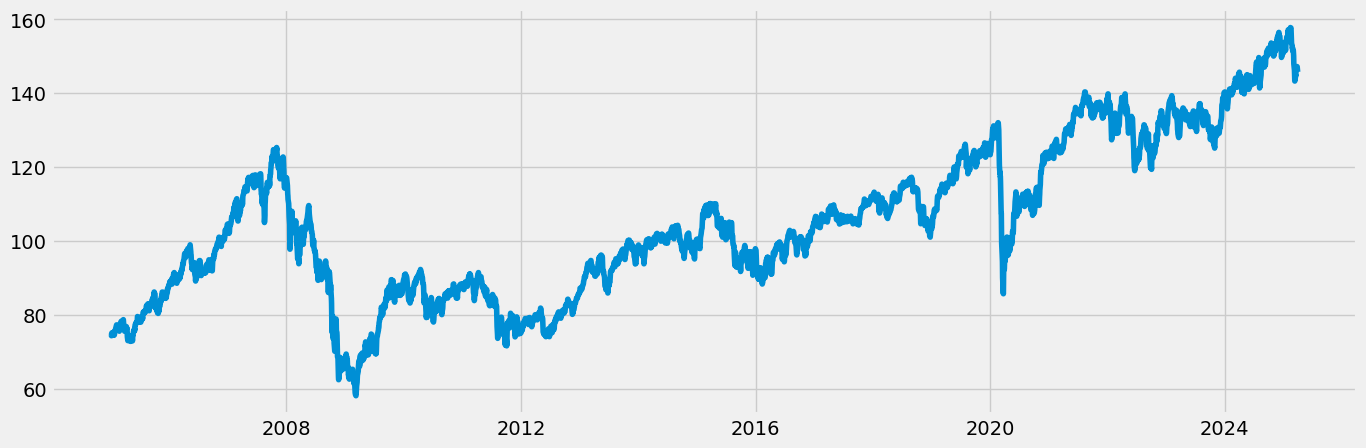

In [383]:
# Plot the ASX200 stock index original raw data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, there will be many plots.
# A large number of plots increases size of the notebook, which could take more time to load and use alot of RAM.

plt.plot(asx200_orig)

##### Non-stationary.

#### Smoothed data: ASX200 stock index 50 SMA (simple moving average, rolling)

In [391]:
asx200_sma50 = asx200_sma50.set_index('timestamp') # Set 'timestamp' (has a datetime format) as the index of the dataframe.
asx200_sma50.head(3)

asx200_idx_sma50
timestamp                   
2005-03-16         76.331175
2005-03-17         76.402376
2005-03-18         76.483242

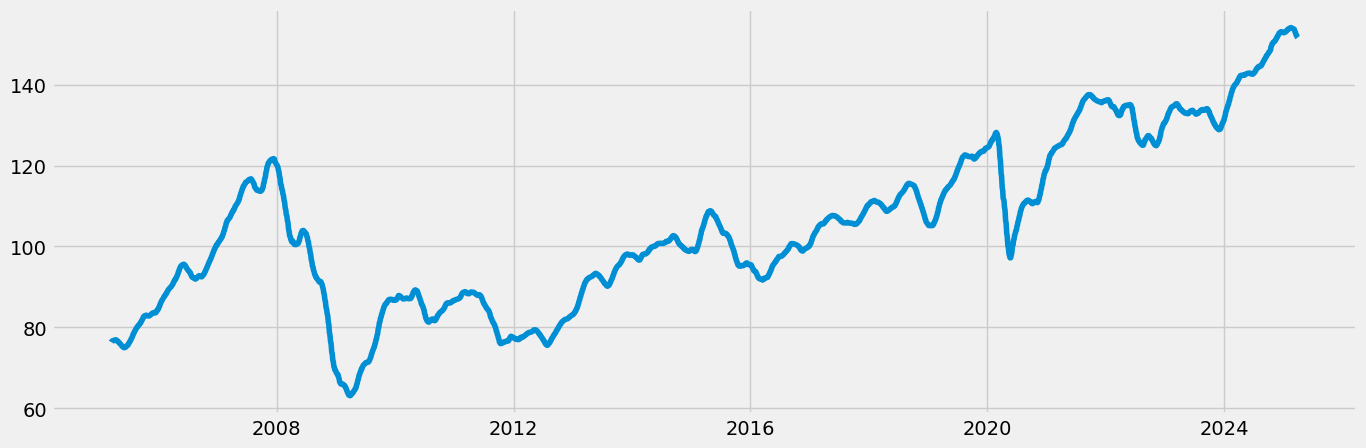

In [393]:
# Plot the ASX200 stock index 50-period SMA
plt.figure(figsize=(15,5), dpi=100) 
plt.plot(asx200_sma50)

##### Non-stationary.

#### Smoothed data: ASX200 stock index 30 SMA (simple moving average, rolling)

In [401]:
asx200_sma30 = asx200_sma30.set_index('timestamp') # Set 'timestamp' (has a datetime format) as the index of the dataframe.
asx200_sma30.head(3)

asx200_idx_sma30
timestamp                   
2005-02-16         75.681848
2005-02-17         75.760119
2005-02-18         75.842326

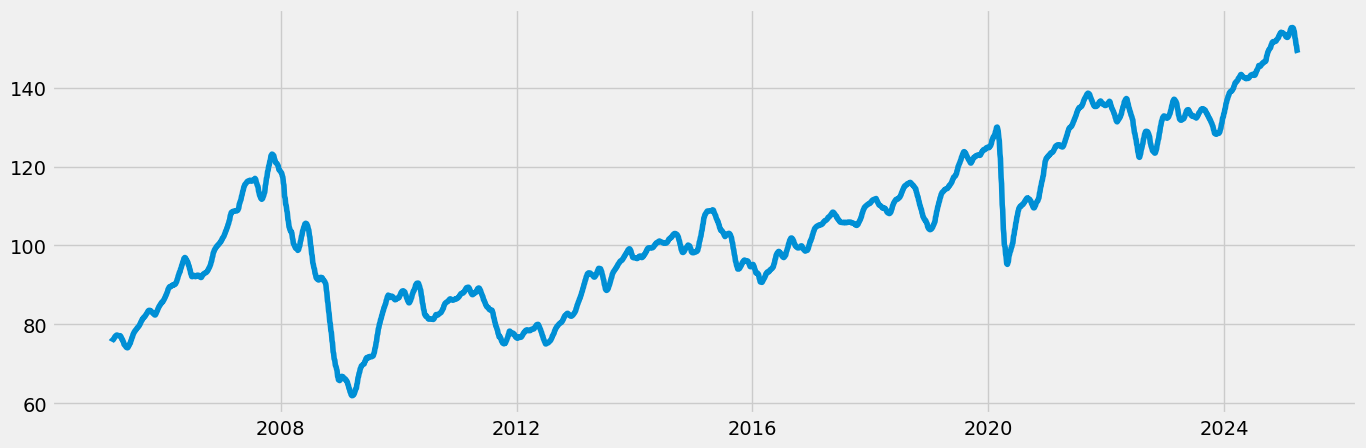

In [403]:
# Plot the ASX200 stock index 30-period SMA
plt.figure(figsize=(15,5), dpi=100) 
plt.plot(asx200_sma30)

##### Non-stationary.

#### Transformed data: ASX200 stock index weekly (5-period) log returns

In [409]:
asx200_logret5 = asx200_logret5.set_index('timestamp') # Set 'timestamp' (has a datetime format) as the index of the dataframe.
asx200_logret5.head(3)

asx200_idx_logret5
timestamp                     
2005-01-12            0.007645
2005-01-13            0.009779
2005-01-14           -0.000394

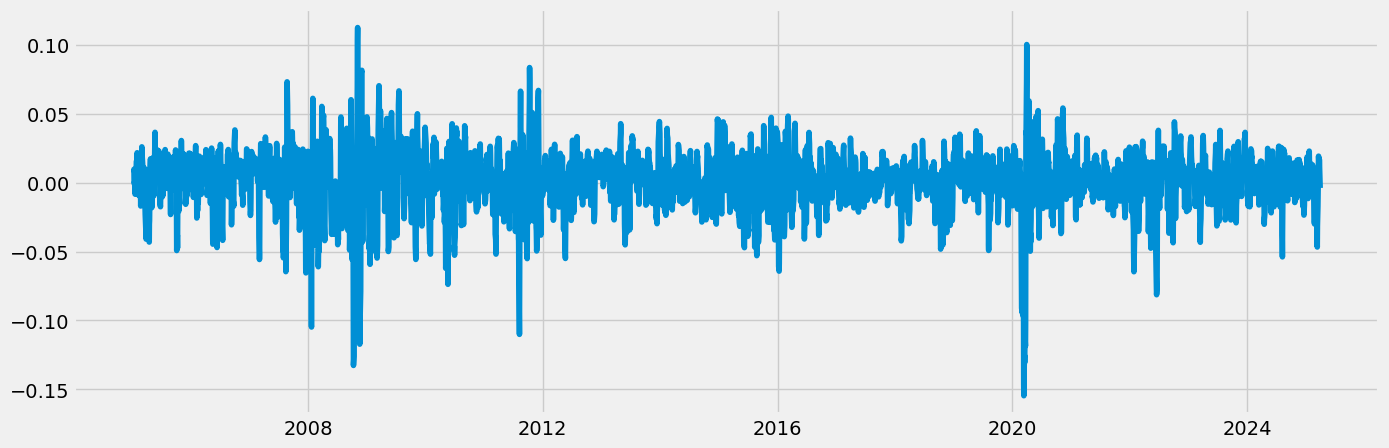

In [411]:
# Plot the ASX200 stock index weekly (5-period) log returns
plt.figure(figsize=(15,5), dpi=100) 
plt.plot(asx200_logret5)

##### More stationary than previous line plots, but variance fluctuates and appears asymmetrical to the downside.

#### Transformed data: ASX200 stock index daily (1-period) log returns

In [418]:
asx200_logret1 = asx200_logret1.set_index('timestamp') # Set 'timestamp' (has a datetime format) as the index of the dataframe.
asx200_logret1.head(3)

asx200_idx_logret1
timestamp                     
2005-01-06           -0.002355
2005-01-07            0.008229
2005-01-10            0.002875

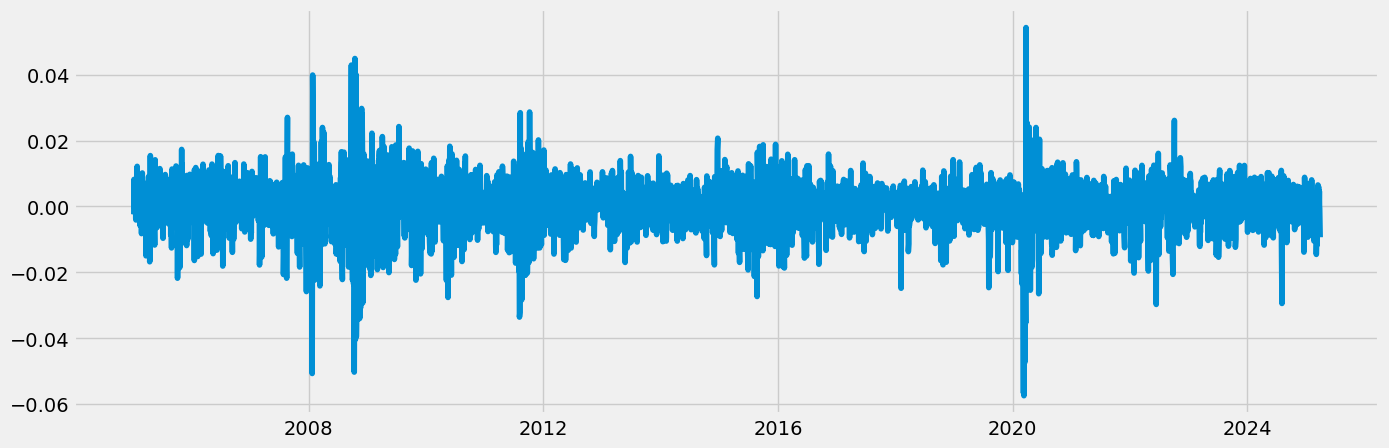

In [420]:
# Plot the ASX200 stock index daily (1-period) log returns
plt.figure(figsize=(15,5), dpi=100) 
plt.plot(asx200_logret1)

##### More stationary but variance fluctuates, still asymmetrical.

#### Raw data: AUDJPY FX cross-rate original 

In [425]:
audjpy_orig = audjpy_orig.set_index('timestamp') # Set 'timestamp' (has a datetime format) as the index of the dataframe.
audjpy_orig.head(3)

aud_jpy
timestamp            
2005-01-05  80.092864
2005-01-06  79.762383
2005-01-07  79.746651

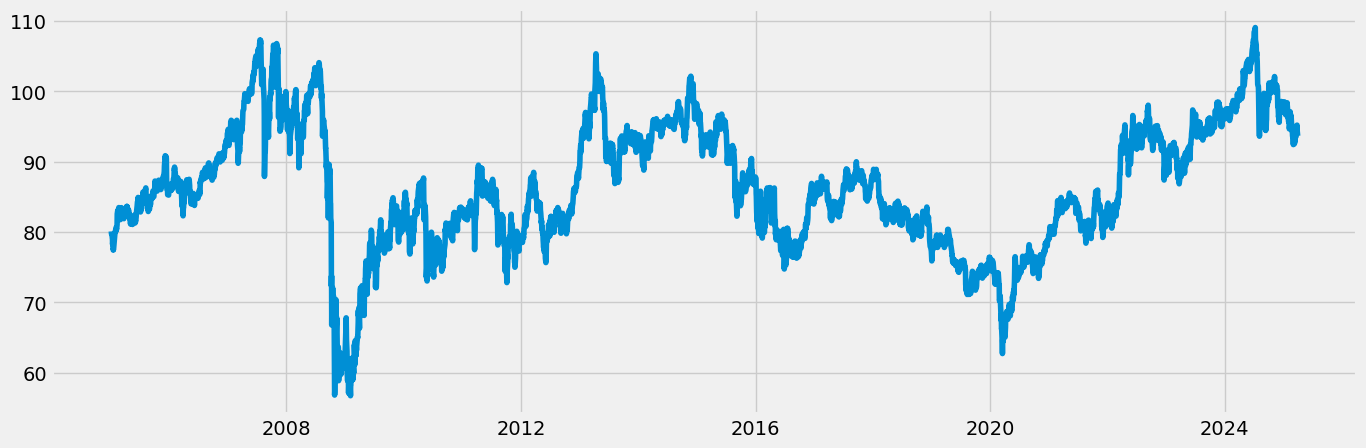

In [427]:
# Plot the AUDJPY original raw data
plt.figure(figsize=(15,5), dpi=100) 
plt.plot(audjpy_orig)

##### Non-stationary.  Does not trend, but variance fluctuates.

#### Smoothed data: AUDJPY 50 SMA (simple moving average, rolling)

In [432]:
audjpy_sma50 = audjpy_sma50.set_index('timestamp') # Set 'timestamp' (has a datetime format) as the index of the dataframe.
audjpy_sma50.head(3)

audjpy_sma50
timestamp               
2005-03-16     80.985134
2005-03-17     81.035666
2005-03-18     81.099539

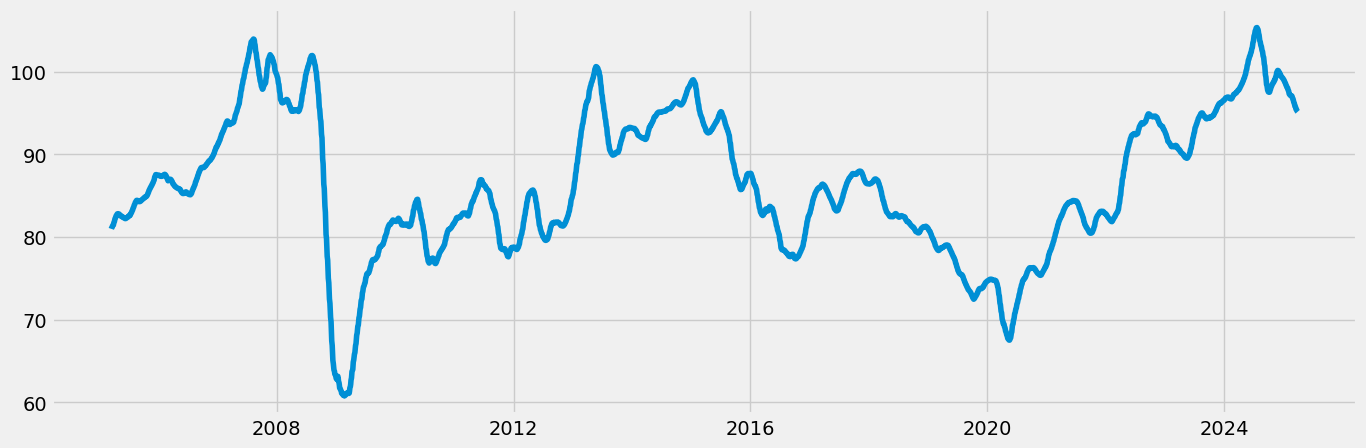

In [434]:
# Plot the AUDJPY 50-period SMA
plt.figure(figsize=(15,5), dpi=100) 
plt.plot(audjpy_sma50)

##### Non-stationary.  Does not trend, but variance fluctuates.

#### Smoothed data: AUDJPY 30 SMA (simple moving average, rolling)

In [440]:
audjpy_sma30 = audjpy_sma30.set_index('timestamp') # Set 'timestamp' (has a datetime format) as the index of the dataframe.
audjpy_sma30.head(3)

audjpy_sma30
timestamp               
2005-02-16     79.846448
2005-02-17     79.922352
2005-02-18     80.033063

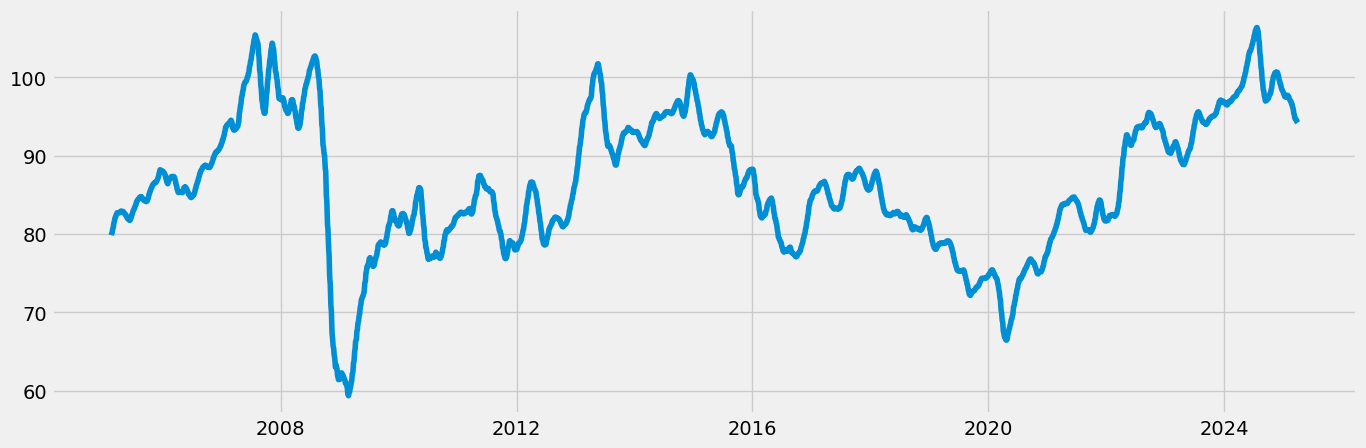

In [442]:
# Plot the AUDJPY 30-period SMA
plt.figure(figsize=(15,5), dpi=100) 
plt.plot(audjpy_sma30)

##### Non-stationary.  Does not trend, but variance fluctuates.

#### Transformed data: AUDJPY weekly (5-period) log returns

In [448]:
audjpy_logret5 = audjpy_logret5.set_index('timestamp') # Set 'timestamp' (has a datetime format) as the index of the dataframe.
audjpy_logret5.head(3)

audjpy_logret5
timestamp                 
2005-01-12       -0.010920
2005-01-13       -0.019108
2005-01-14       -0.015449

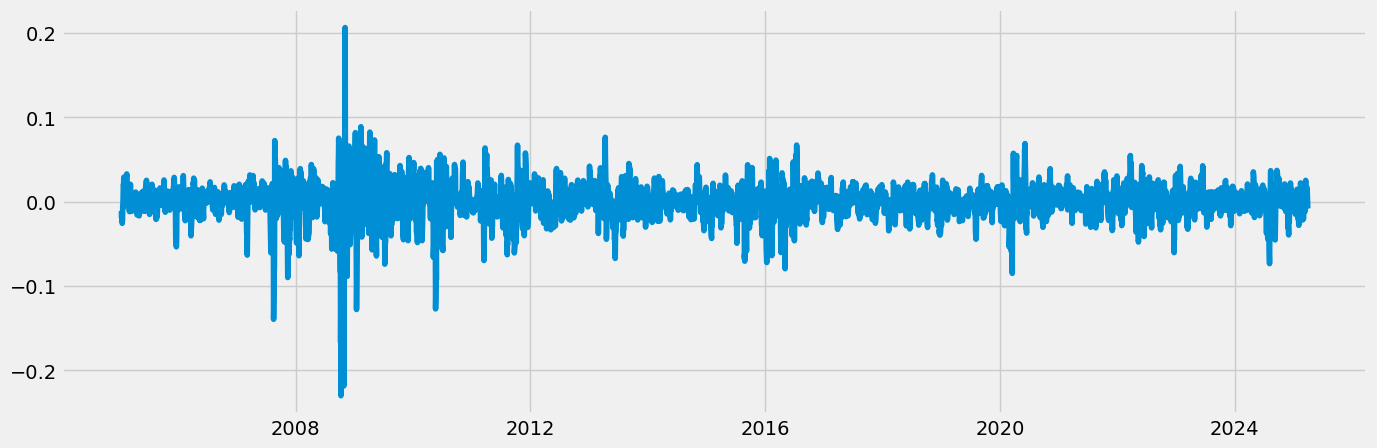

In [450]:
# Plot the AUDJPY weekly (5-period) log returns
plt.figure(figsize=(15,5), dpi=100) 
plt.plot(audjpy_logret5)

##### More stationary than previous line plots, but variance fluctuates and appears asymmetrical to the downside.

#### Transformed data: AUDJPY daily (1-period) log returns

In [456]:
audjpy_logret1 = audjpy_logret1.set_index('timestamp') # Set 'timestamp' (has a datetime format) as the index of the dataframe.
audjpy_logret1.head(3)

audjpy_logret1
timestamp                 
2005-01-06       -0.004135
2005-01-07       -0.000197
2005-01-10       -0.003803

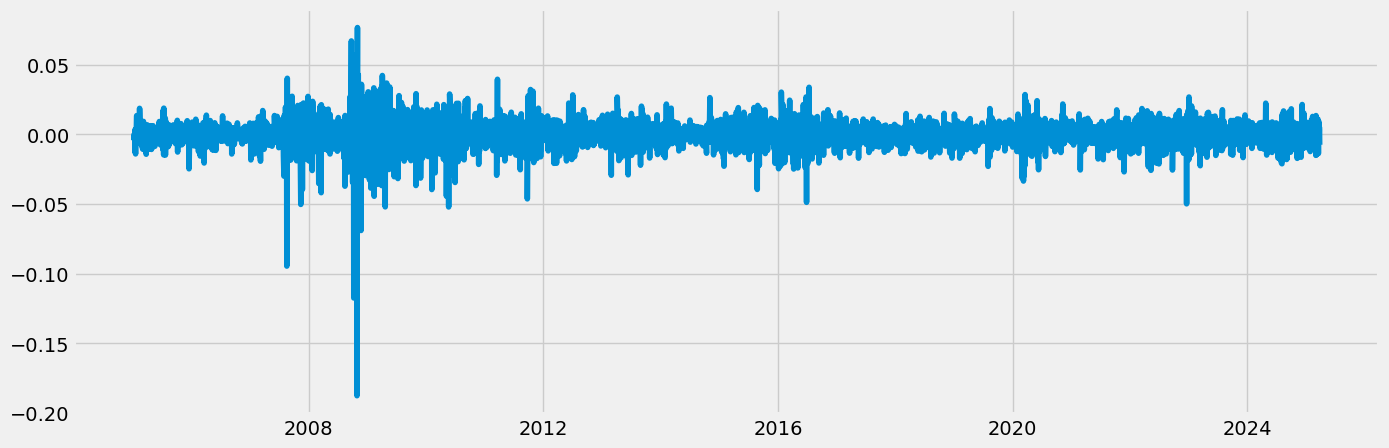

In [458]:
# Plot the AUDJPY weekly (1-period) log returns
plt.figure(figsize=(15,5), dpi=100) 
plt.plot(audjpy_logret1)

##### More stationary but variance fluctuates, still asymmetrical.

### 03. Time series analysis: decomposition

#### ASX200

#### Further preprocessing of the temporal grain with data interpolation for missing day gaps

In [490]:
# Check if index is business day frequency
expected_range = pd.date_range(start=asx200_orig.index.min(), end=asx200_orig.index.max(), freq='B')
actual_range = asx200_orig.index

missing_dates = expected_range.difference(actual_range)

if missing_dates.empty:
    print("✅ The time index is continuous on business days. No action needed.")
else:
    print(f"⚠️ {len(missing_dates)} business days are missing from the time index.")
    print("First few missing dates:")
    print(missing_dates[:5])

⚠️ 159 business days are missing from the time index.
First few missing dates:
DatetimeIndex(['2005-01-26', '2005-03-25', '2005-03-28', '2005-04-25',
               '2005-06-13'],
              dtype='datetime64[ns]', freq=None)


In [492]:
# From the result above, we need to reindex to a business day frequency
# Apply .asfreq('B') to reindex to business day frequency
# This will introduce NaNs on missing dates

asx200_orig_bfreq = asx200_orig.asfreq('B')

In [498]:
# Interpolate to fill small gaps (159 business days missing from 5,120 + 159 is ~ 3% of the data, e.g. OK to interpolate here)
# Use method='linear' for numerical, or method='ffill' for market-type data.  Method chosen is 'ffill'.
asx200_orig_bfreq_interp = asx200_orig_bfreq.interpolate(method='ffill')

In [500]:
# Optional sanity check:
print("Final shape after reindexing and interpolating:", asx200_orig_bfreq_interp.shape)

Final shape after reindexing and interpolating: (5279, 1)


#### Note: because the smoothed subset dataframes (SMA 50, SMA 30) and transformed dataframes (5-day log returns, 1-day log returns), were all derived from the original raw data values (and temporal grain), which had the 159 missing business days, then the additional preprocessing procedures above need to be repeated for each subset dataframe to ensure like-with-like comparisons, valid stationarity checks, stationarization and forecasting, from a temporally-consistent data input angle.

In [504]:
# Reindex to business day frequency, interpolate gaps with 'ffill', check final dimensions
asx200_sma50_bfreq = asx200_sma50.asfreq('B')
asx200_sma50_bfreq_interp = asx200_sma50_bfreq.interpolate(method='ffill')
print("Final shape after reindexing and interpolating:", asx200_sma50_bfreq_interp.shape)

Final shape after reindexing and interpolating: (5229, 1)


In [506]:
# Reindex to business day frequency, interpolate gaps with 'ffill', check final dimensions
asx200_sma30_bfreq = asx200_sma30.asfreq('B')
asx200_sma30_bfreq_interp = asx200_sma30_bfreq.interpolate(method='ffill')
print("Final shape after reindexing and interpolating:", asx200_sma30_bfreq_interp.shape)

Final shape after reindexing and interpolating: (5249, 1)


In [510]:
# Reindex to business day frequency, interpolate gaps with 'ffill', check final dimensions
asx200_logret5_bfreq = asx200_logret5.asfreq('B')
asx200_logret5_bfreq_interp = asx200_logret5_bfreq.interpolate(method='ffill')
print("Final shape after reindexing and interpolating:", asx200_logret5_bfreq_interp.shape)

Final shape after reindexing and interpolating: (5274, 1)


In [512]:
# Reindex to business day frequency, interpolate gaps with 'ffill', check final dimensions
asx200_logret1_bfreq = asx200_logret1.asfreq('B')
asx200_logret1_bfreq_interp = asx200_logret1_bfreq.interpolate(method='ffill')
print("Final shape after reindexing and interpolating:", asx200_logret1_bfreq_interp.shape)

Final shape after reindexing and interpolating: (5278, 1)


#### Decompose Raw data: ASX200 stock index original 

In [652]:
# Decompose the time series using an additive model
# Note: correct period selection is crucial
# Choose 252 (business days) for daily, SMA 50, MA 50 and 1-day (e.g. daily) log returns, to get an annual seasonality profile
# Choose 52 (business days) for 5-day (e.g. weekly) log returns, to get an annual seasonality profile

decomposition_asx200_orig = sm.tsa.seasonal_decompose(asx200_orig_bfreq_interp, model='additive', period=252)

In [521]:
# Note at session start we imported the pylab library function rcParams
# This line (below) will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

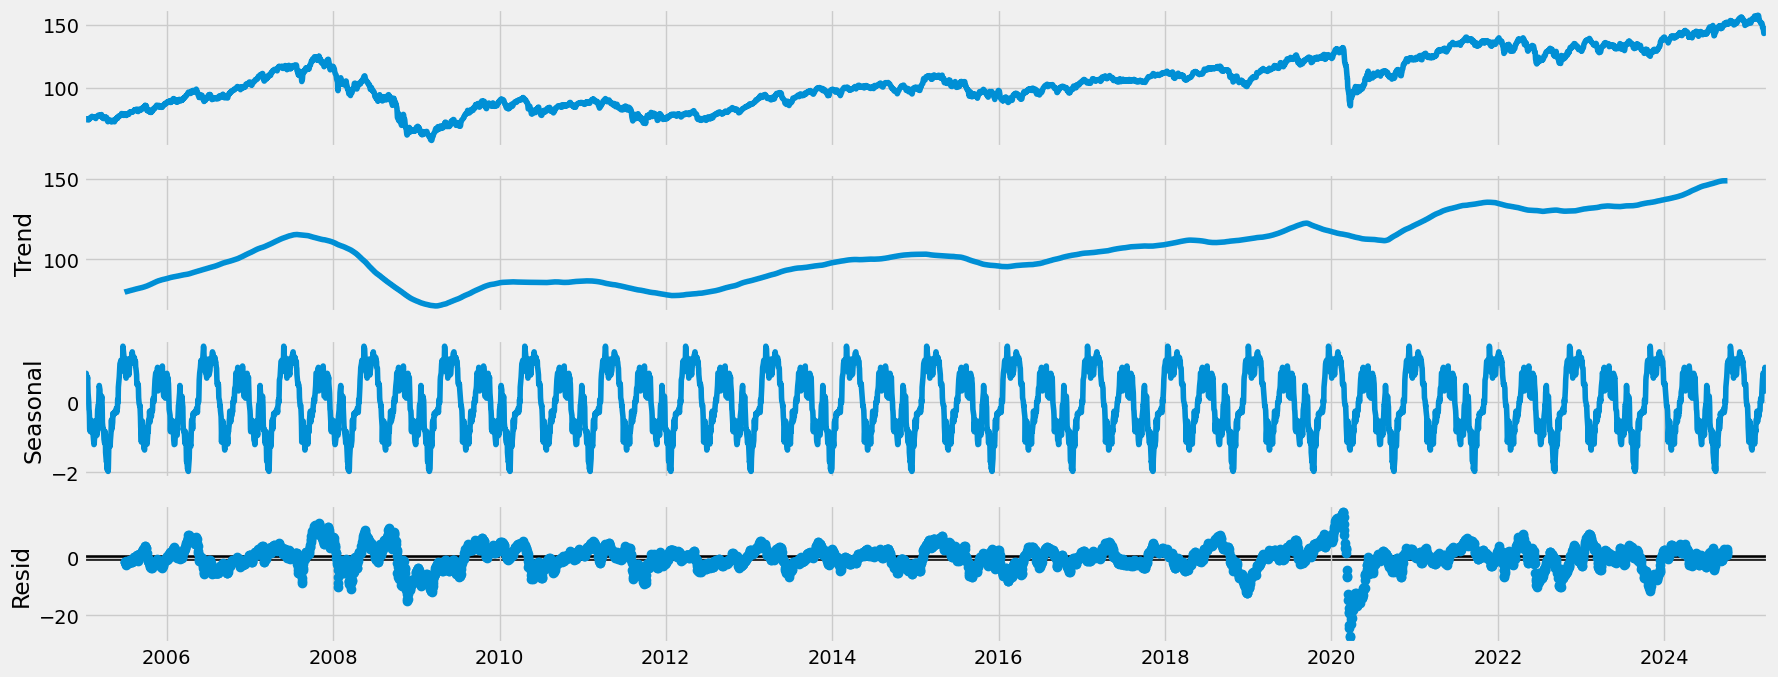

In [525]:
# Plot the separate components

decomposition_asx200_orig.plot()
plt.show()

##### Non-stationary, trending, seasonal, residuals amplitude varies, especially during Covid-19 (year 2020).

#### Decompose smoothed data: ASX200 stock index 50 SMA (simple moving average, rolling)

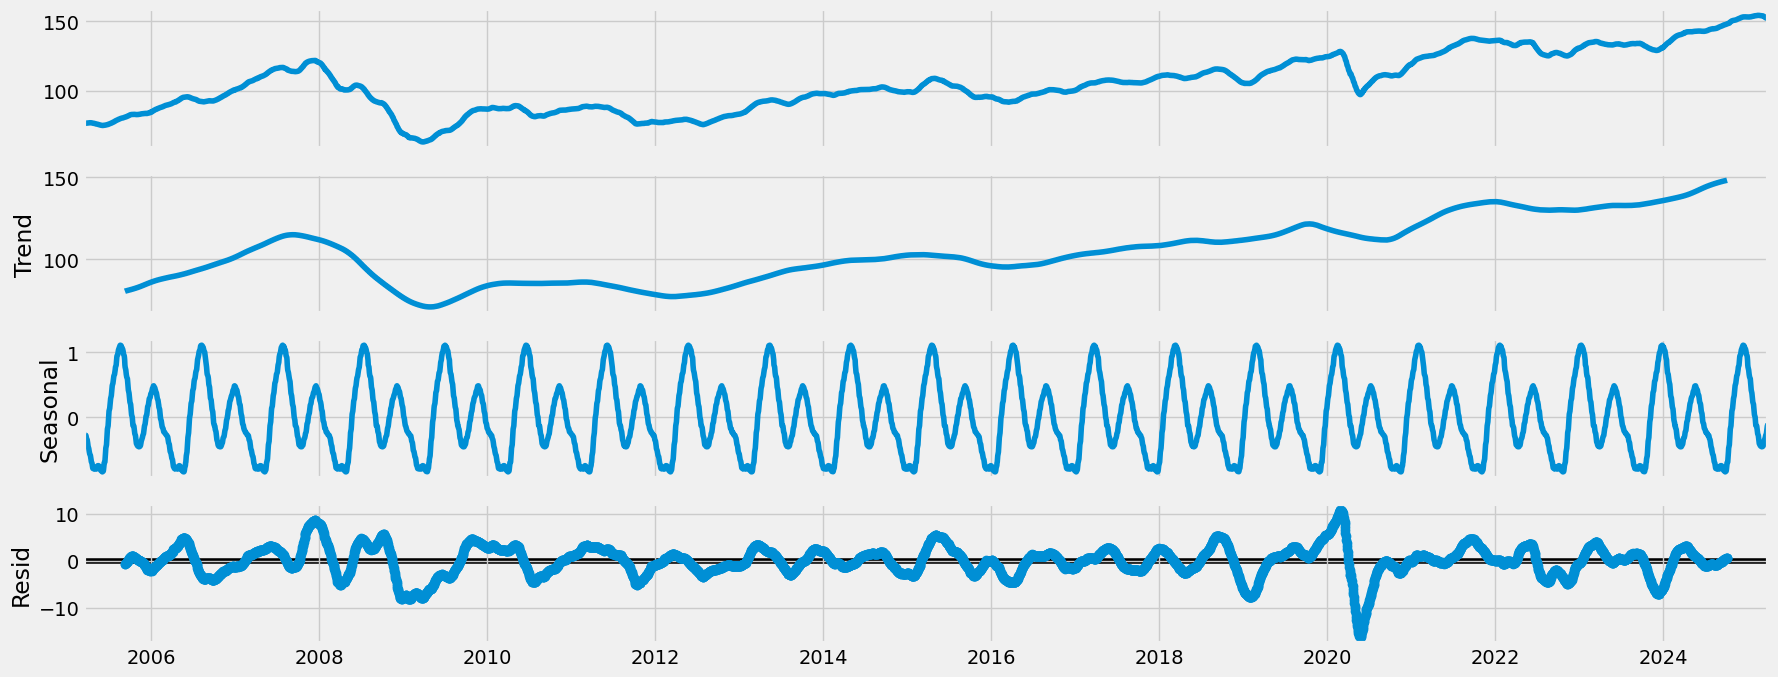

In [534]:
# Note: See comments for steps to the decomposition procedure in the ASX200 raw data decomposition (above)
decomposition_asx200_sma50 = sm.tsa.seasonal_decompose(asx200_sma50_bfreq_interp, model='additive', period=252)
rcParams['figure.figsize'] = 18, 7
decomposition_asx200_sma50.plot()
plt.show()

##### Still non-stationary, 50-day smoothing did not improve the basic structure of the data on the evaluated scales.

#### Decompose smoothed data: ASX200 stock index 30 SMA (simple moving average, rolling)

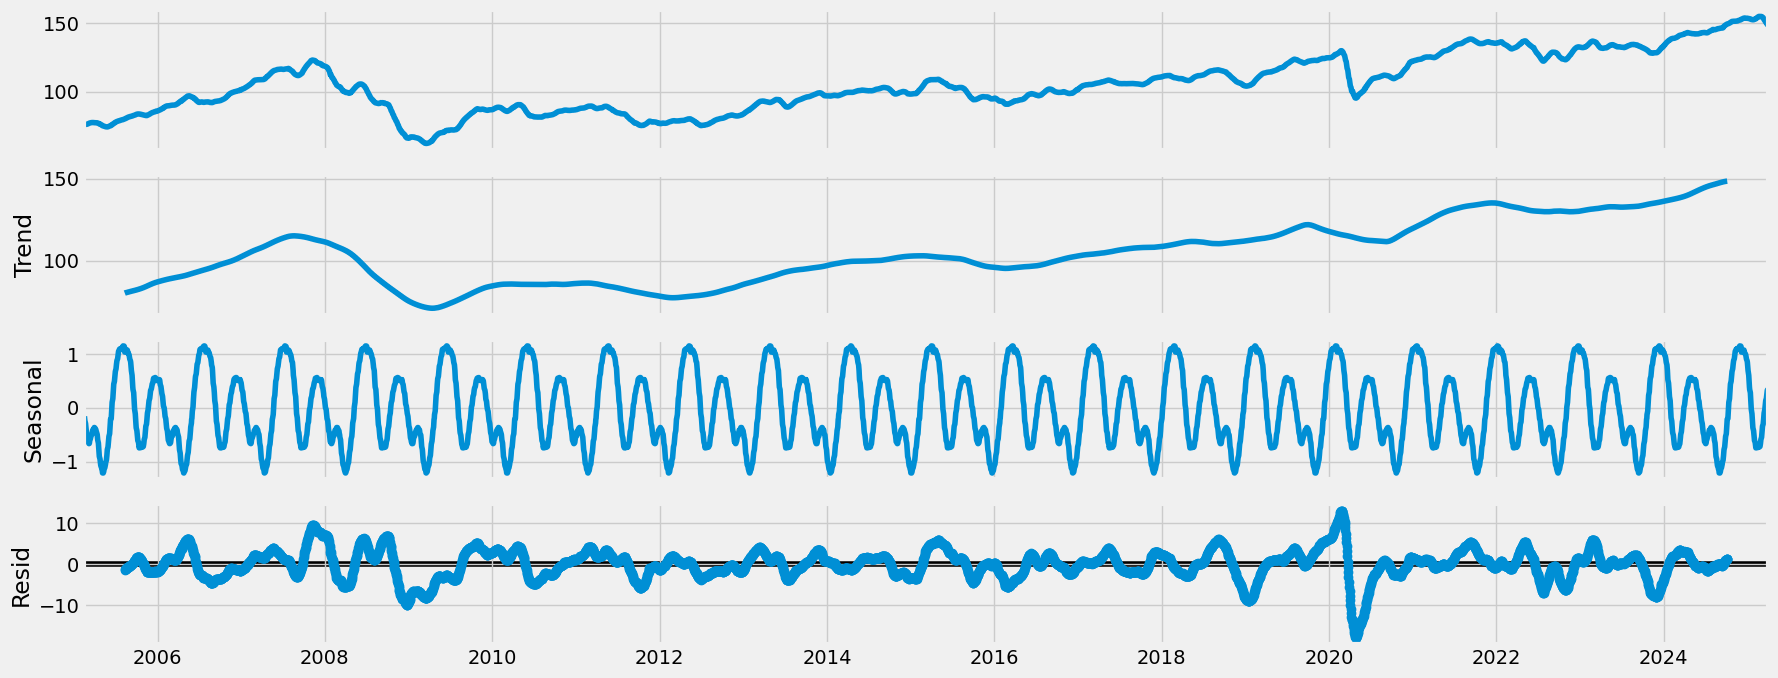

In [537]:
# Note: See comments for steps to the decomposition procedure in the ASX200 raw data decomposition (above)
decomposition_asx200_sma30 = sm.tsa.seasonal_decompose(asx200_sma30_bfreq_interp, model='additive', period=252)
rcParams['figure.figsize'] = 18, 7
decomposition_asx200_sma30.plot()
plt.show()

##### More "non-stationary" than the SMA 50 result.

#### Decompose transformed data: ASX200 stock index 5-day (weekly) log returns

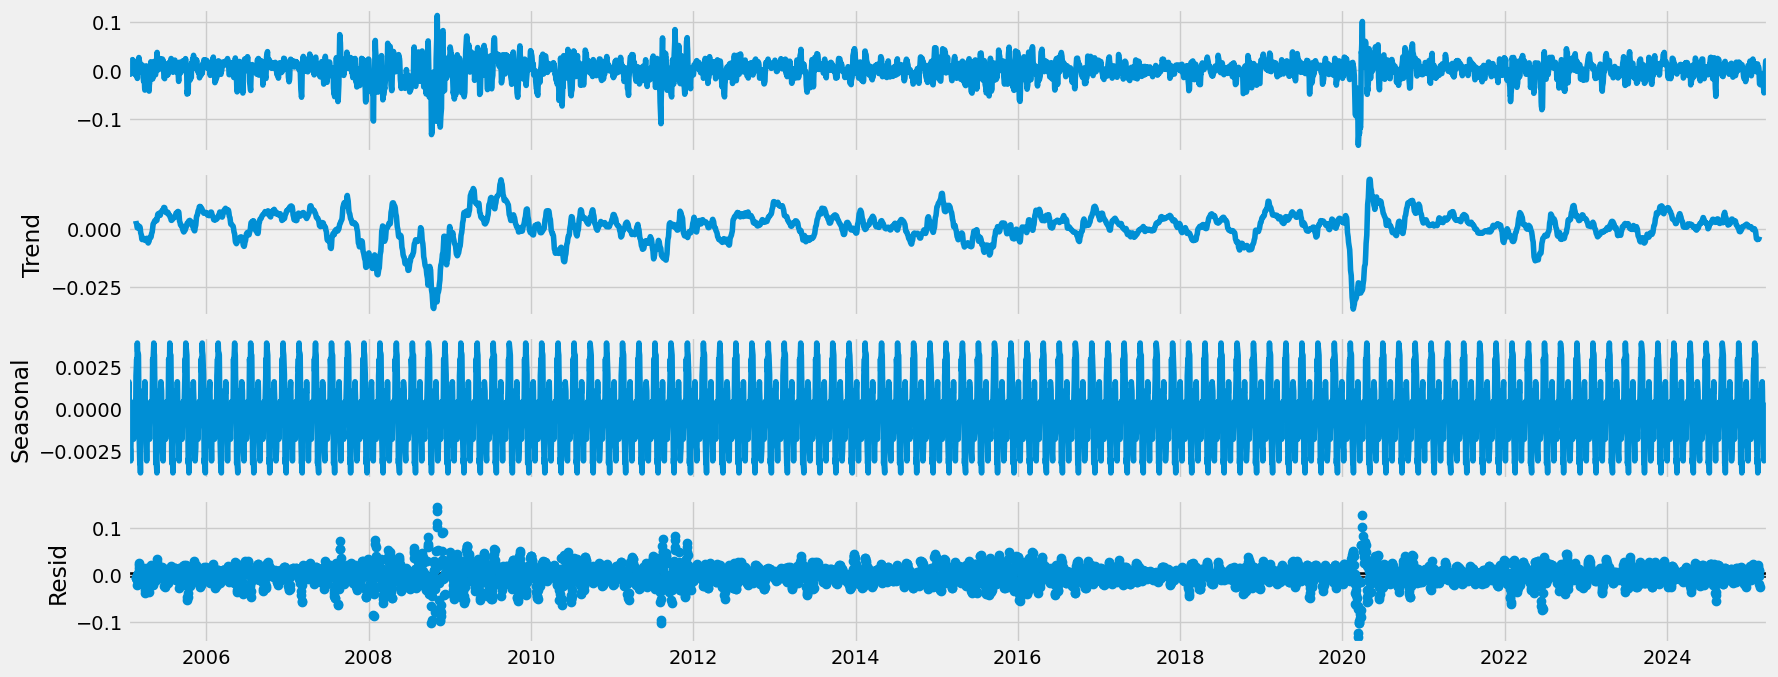

In [544]:
# Note: See comments for steps to the decomposition procedure in the ASX200 raw data decomposition (above)
# The period selection here switches to 52 (to get annual off a weekly data grain)
decomposition_asx200_logret5 = sm.tsa.seasonal_decompose(asx200_logret5_bfreq_interp, model='additive', period=52)
rcParams['figure.figsize'] = 18, 7
decomposition_asx200_logret5.plot()
plt.show()

##### This is more stationary-like (no trend, as an improvement), with some crisis-inspired volatile "bumps' in trend and residuals (caused by the GFC "Global Financial Crisis", and Covid-19). We need to see what the ADF (Augmented Dickey-Fuller test) and ACF (Autocorrelation Function) statistical results yield, to determine whether this is sufficiently stationary or not for subsequent forecasting (e.g. with ARIMA or other models, which require stationarity as one of their assumptions).

#### Decompose transformed data: ASX200 stock index 1-day (daily) log returns

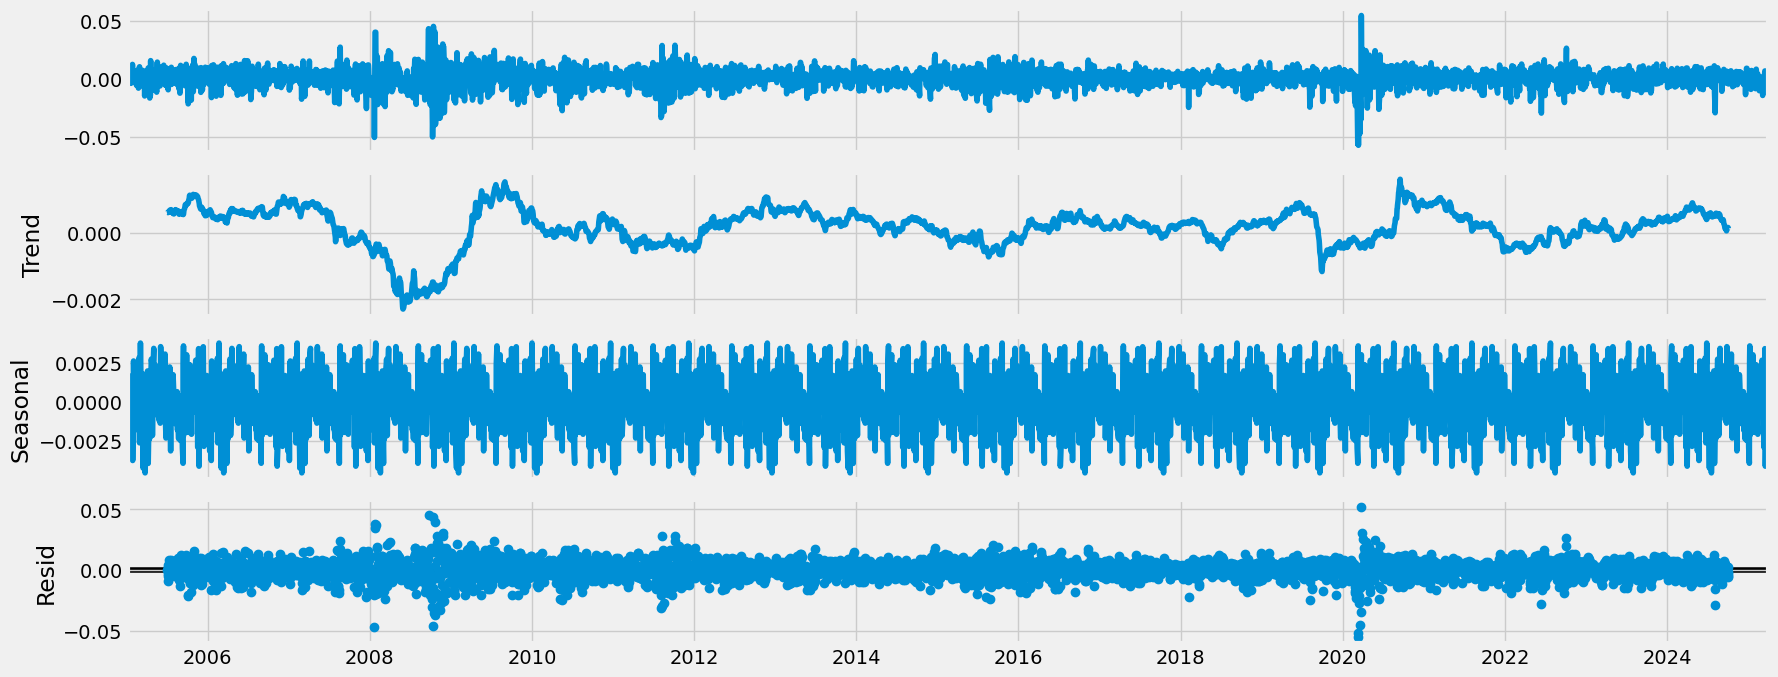

In [680]:
# Note: See comments for steps to the decomposition procedure in the ASX200 raw data decomposition (above)
# The period selection here returns to 252 (to get annual off a daily data grain)
decomposition_asx200_logret1 = sm.tsa.seasonal_decompose(asx200_logret1_bfreq_interp, model='additive', period=252)
rcParams['figure.figsize'] = 18, 7
decomposition_asx200_logret1.plot()
plt.show()

##### Results similar to the 5-day log return ones, but daily log returns presumably introduce more "noise" compared to 5-day returns (a bit of a smoothing effect there), so we need to see what the stationarity statistical tests indicate.

#### AUDJPY

#### Further preprocessing of the temporal grain with data interpolation for missing day gaps

In [627]:
# Check if index is business day frequency
expected_range = pd.date_range(start=audjpy_orig.index.min(), end=audjpy_orig.index.max(), freq='B')
actual_range = audjpy_orig.index

missing_dates = expected_range.difference(actual_range)

if missing_dates.empty:
    print("✅ The time index is continuous on business days. No action needed.")
else:
    print(f"⚠️ {len(missing_dates)} business days are missing from the time index.")
    print("First few missing dates:")
    print(missing_dates[:5])

⚠️ 159 business days are missing from the time index.
First few missing dates:
DatetimeIndex(['2005-01-26', '2005-03-25', '2005-03-28', '2005-04-25',
               '2005-06-13'],
              dtype='datetime64[ns]', freq=None)


#### Comment: same result as the business day "completeness" check we ran on ASX200 daily raw data (above)

In [632]:
# From the result above, we need to reindex to a business day frequency
# Apply .asfreq('B') to reindex to business day frequency
# This will introduce NaNs on missing dates

audjpy_orig_bfreq = audjpy_orig.asfreq('B')

In [634]:
# Interpolate to fill small gaps (159 business days missing from 5,120 + 159 is ~ 3% of the data, e.g. OK to interpolate here)
# Use method='linear' for numerical, or method='ffill' for market-type data.  Method chosen is 'ffill'.
audjpy_orig_bfreq_interp = audjpy_orig_bfreq.interpolate(method='ffill')

In [636]:
# Optional sanity check:
print("Final shape after reindexing and interpolating:", audjpy_orig_bfreq_interp.shape)

Final shape after reindexing and interpolating: (5279, 1)


#### Note: because the smoothed subset dataframes (SMA 50, SMA 30) and transformed dataframes (5-day log returns, 1-day log returns), were all derived from the original raw data values (and temporal grain), which had the 159 missing business days, then the additional preprocessing procedures above need to be repeated for each subset dataframe to ensure like-with-like comparisons, valid stationarity checks, stationarization and forecasting, from a temporally-consistent data input angle.

In [640]:
# Reindex to business day frequency, interpolate gaps with 'ffill', check final dimensions
audjpy_sma50_bfreq = audjpy_sma50.asfreq('B')
audjpy_sma50_bfreq_interp = audjpy_sma50_bfreq.interpolate(method='ffill')
print("Final shape after reindexing and interpolating:", audjpy_sma50_bfreq_interp.shape)

Final shape after reindexing and interpolating: (5229, 1)


In [642]:
# Reindex to business day frequency, interpolate gaps with 'ffill', check final dimensions
audjpy_sma30_bfreq = audjpy_sma30.asfreq('B')
audjpy_sma30_bfreq_interp = audjpy_sma30_bfreq.interpolate(method='ffill')
print("Final shape after reindexing and interpolating:", audjpy_sma30_bfreq_interp.shape)

Final shape after reindexing and interpolating: (5249, 1)


In [646]:
# Reindex to business day frequency, interpolate gaps with 'ffill', check final dimensions
audjpy_logret5_bfreq = audjpy_logret5.asfreq('B')
audjpy_logret5_bfreq_interp = audjpy_logret5_bfreq.interpolate(method='ffill')
print("Final shape after reindexing and interpolating:", audjpy_logret5_bfreq_interp.shape)

Final shape after reindexing and interpolating: (5274, 1)


In [648]:
# Reindex to business day frequency, interpolate gaps with 'ffill', check final dimensions
audjpy_logret1_bfreq = audjpy_logret1.asfreq('B')
audjpy_logret1_bfreq_interp = audjpy_logret1_bfreq.interpolate(method='ffill')
print("Final shape after reindexing and interpolating:", audjpy_logret1_bfreq_interp.shape)

Final shape after reindexing and interpolating: (5278, 1)


#### Decompose Raw data: AUDJPY

In [654]:
# Decompose the time series using an additive model
# Note: correct period selection is crucial
# Choose 252 (business days) for daily, SMA 50, MA 50 and 1-day (e.g. daily) log returns, to get an annual seasonality profile
# Choose 52 (business days) for 5-day (e.g. weekly) log returns, to get an annual seasonality profile

decomposition_audjpy_orig = sm.tsa.seasonal_decompose(audjpy_orig_bfreq_interp, model='additive', period=252)

In [656]:
# Note at session start we imported the pylab library function rcParams
# This line (below) will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

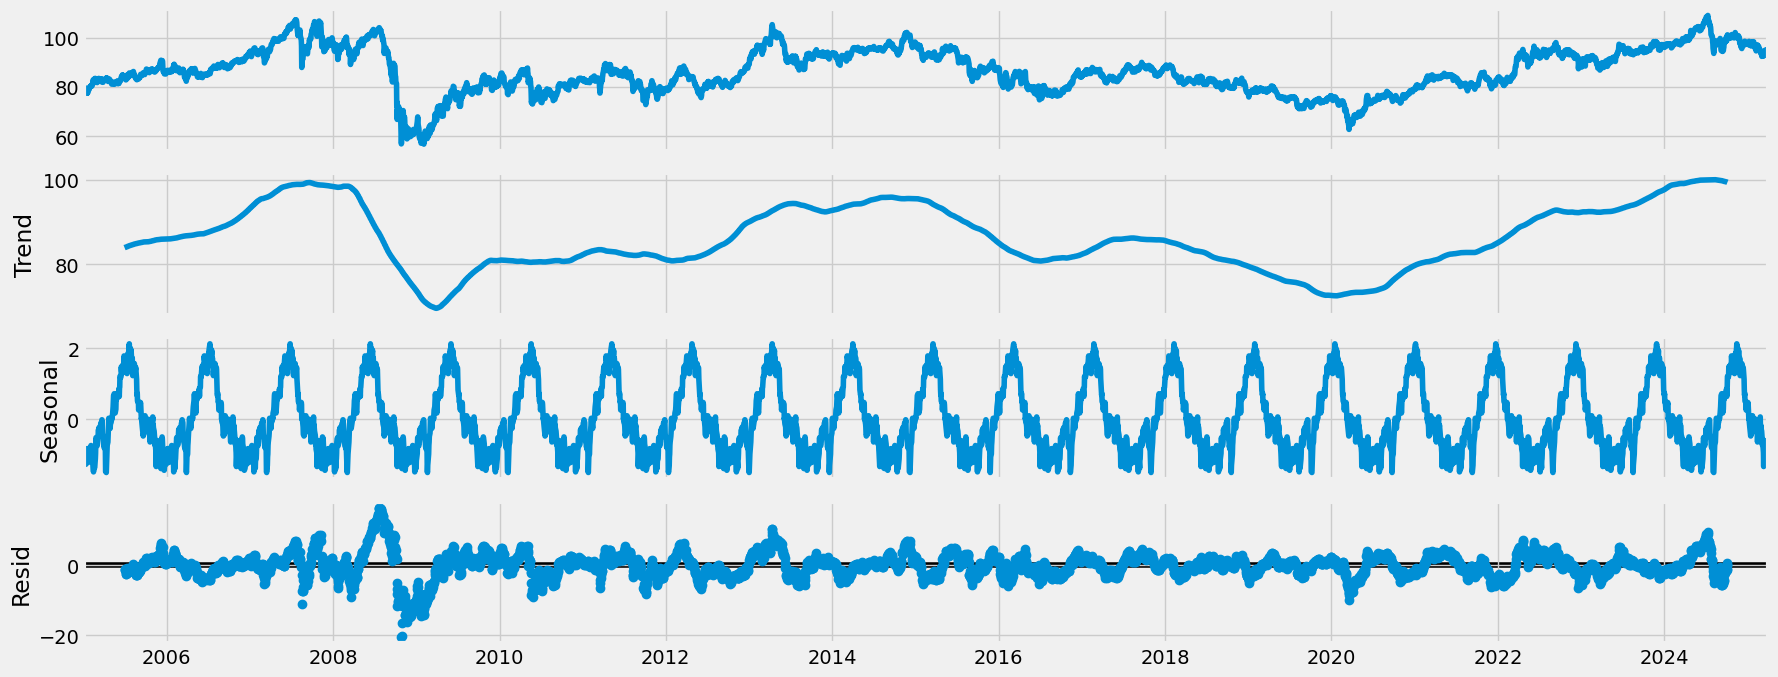

In [658]:
# Plot the separate components

decomposition_audjpy_orig.plot()
plt.show()

##### Non-stationary: although not trending, there is seasonality, and the residuals amplitude varies, at least around the GFC ("Global Financial Crisis" exogenous shock period), although surprisingly Covid-19 (2020+) did not impact residuals as much as the GFC did.

#### Decompose smoothed data: AUDJPY 50 SMA (simple moving average, rolling)

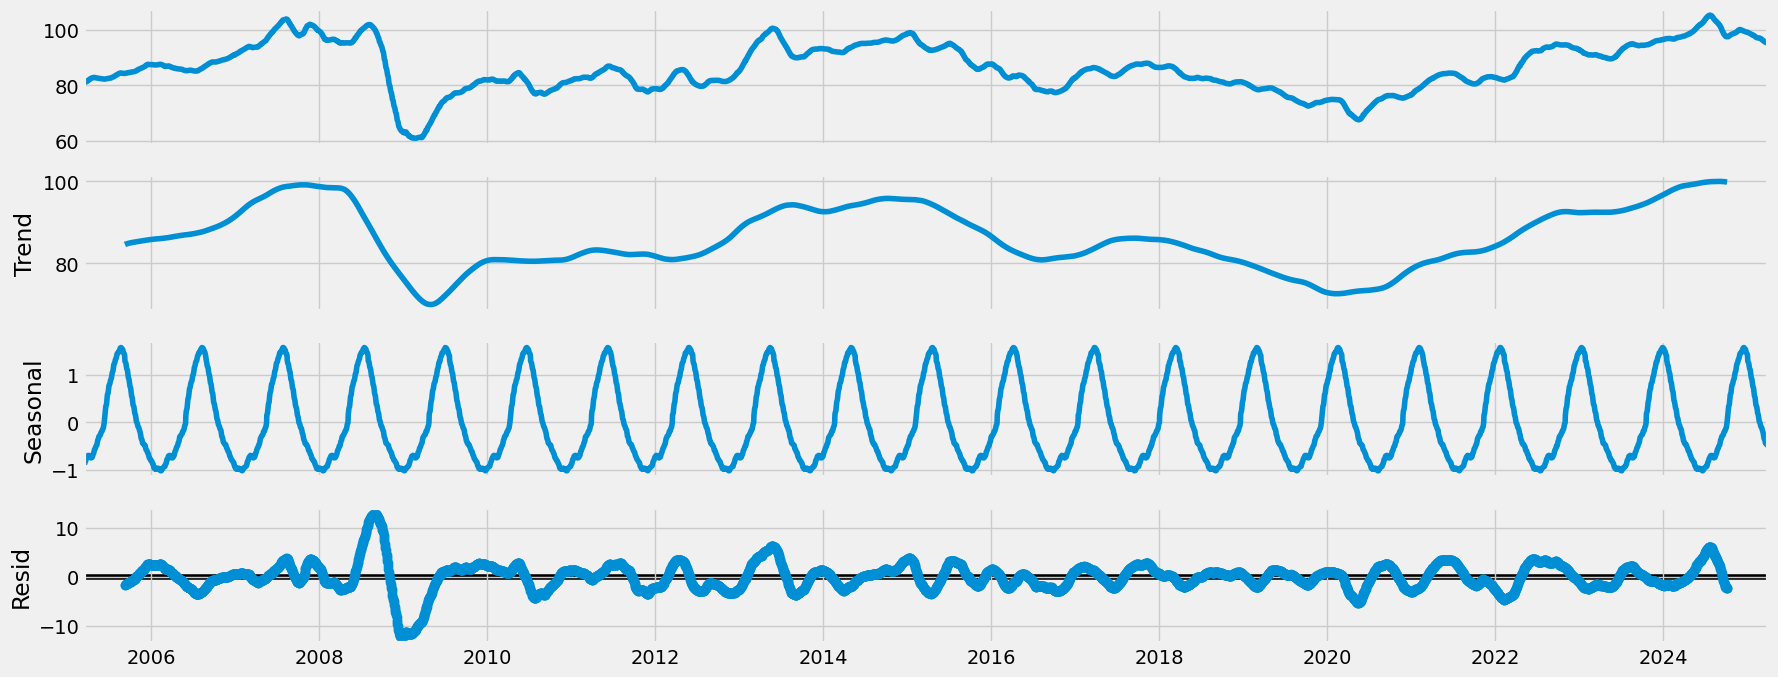

In [663]:
# Note: See comments for steps to the decomposition procedure in the AUDJPY raw data decomposition (above)
decomposition_audjpy_sma50 = sm.tsa.seasonal_decompose(audjpy_sma50_bfreq_interp, model='additive', period=252)
rcParams['figure.figsize'] = 18, 7
decomposition_audjpy_sma50.plot()
plt.show()

##### Again, not much improvement over the raw data decomposition, as happened with the ASX200 time series data.  Non-stationary.

#### Decompose smoothed data: AUDJPY 30 SMA (simple moving average, rolling)

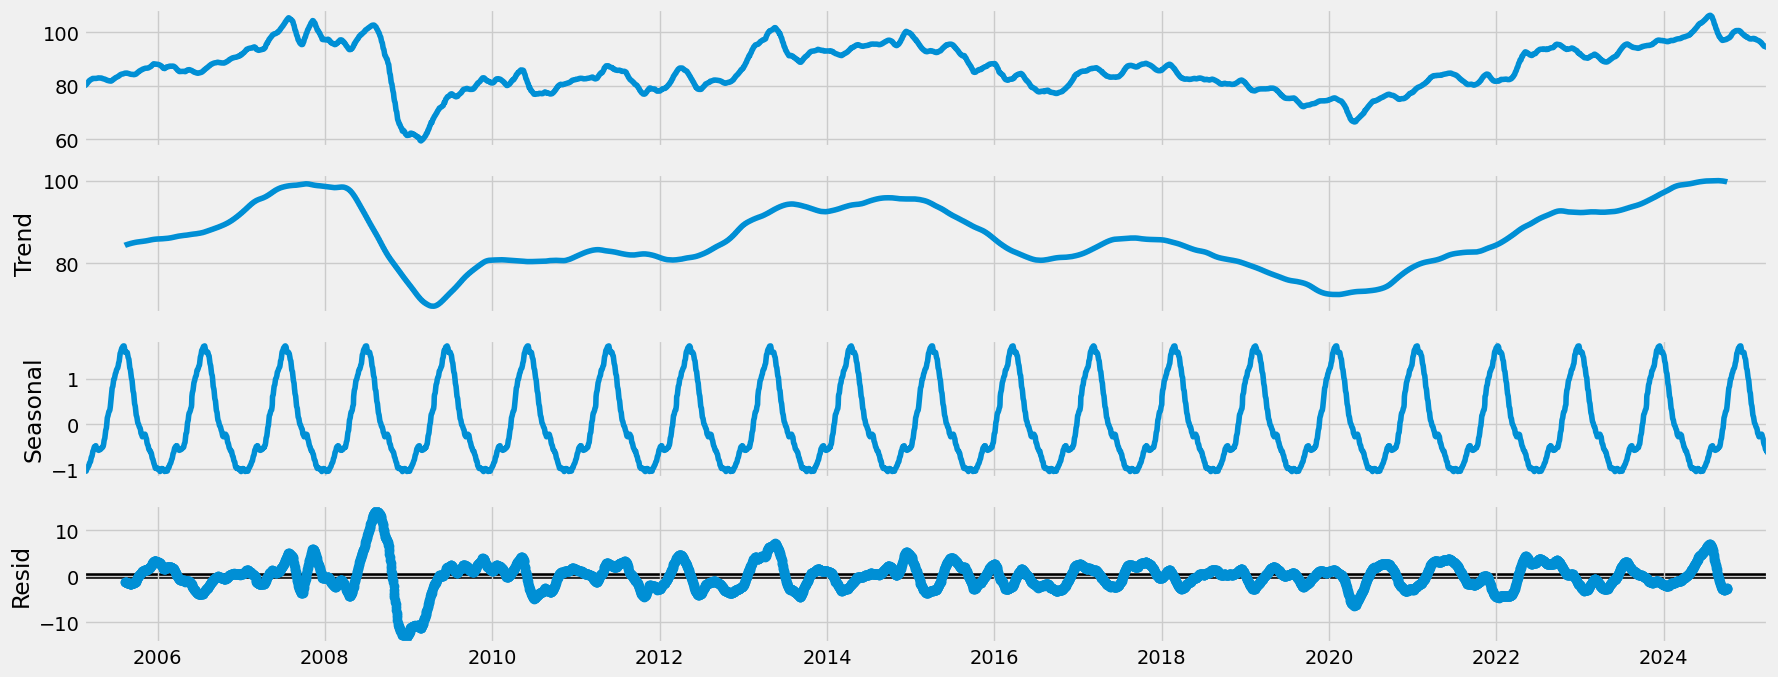

In [667]:
# Note: See comments for steps to the decomposition procedure in the AUDJPY raw data decomposition (above)
decomposition_audjpy_sma30 = sm.tsa.seasonal_decompose(audjpy_sma30_bfreq_interp, model='additive', period=252)
rcParams['figure.figsize'] = 18, 7
decomposition_audjpy_sma30.plot()
plt.show()

##### Result in-between the raw data and 50 SMA decompositions: non-stationary.

### Decompose transformed data: AUDJPY 5-day (weekly) log returns

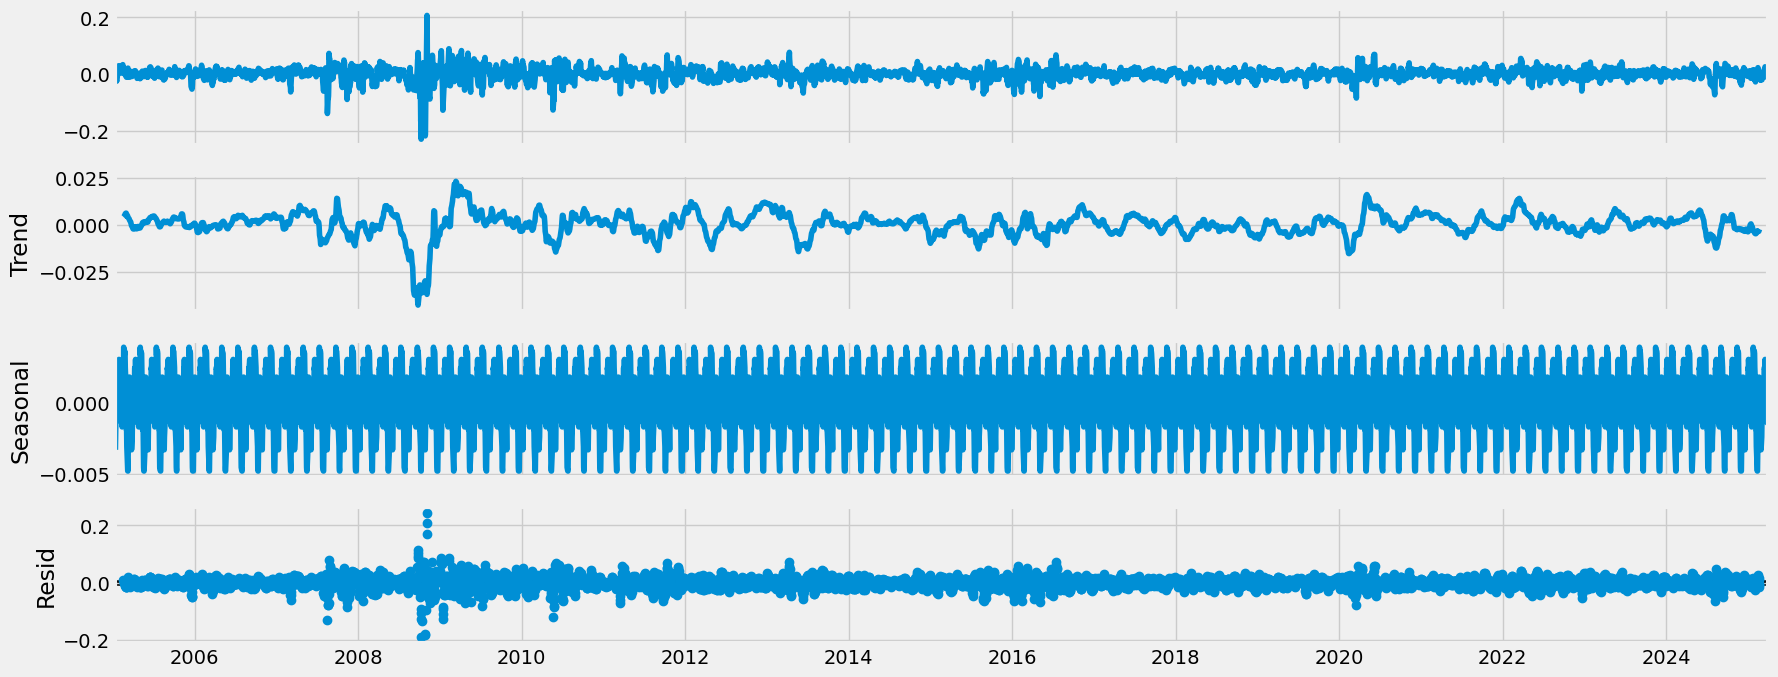

In [675]:
# Note: See comments for steps to the decomposition procedure in the AUDJPY raw data decomposition (above)
# The period selection here switches to 52 (to get annual off a weekly data grain)
decomposition_audjpy_logret5 = sm.tsa.seasonal_decompose(audjpy_logret5_bfreq_interp, model='additive', period=52)
rcParams['figure.figsize'] = 18, 7
decomposition_audjpy_logret5.plot()
plt.show()

##### This is more stationary-like (no trend, as an improvement), with some crisis-inspired volatile "bumps' in trend and residuals (caused by the GFC "Global Financial Crisis" primarily). We need to see what the ADF (Augmented Dickey-Fuller test) and ACF (Autocorrelation Function) statistical results yield, to determine whether this is sufficiently stationary or not for subsequent forecasting (e.g. with ARIMA or other models, which require stationarity as one of their assumptions).

### Decompose transformed data: AUDJPY 1-day (daily) log returns

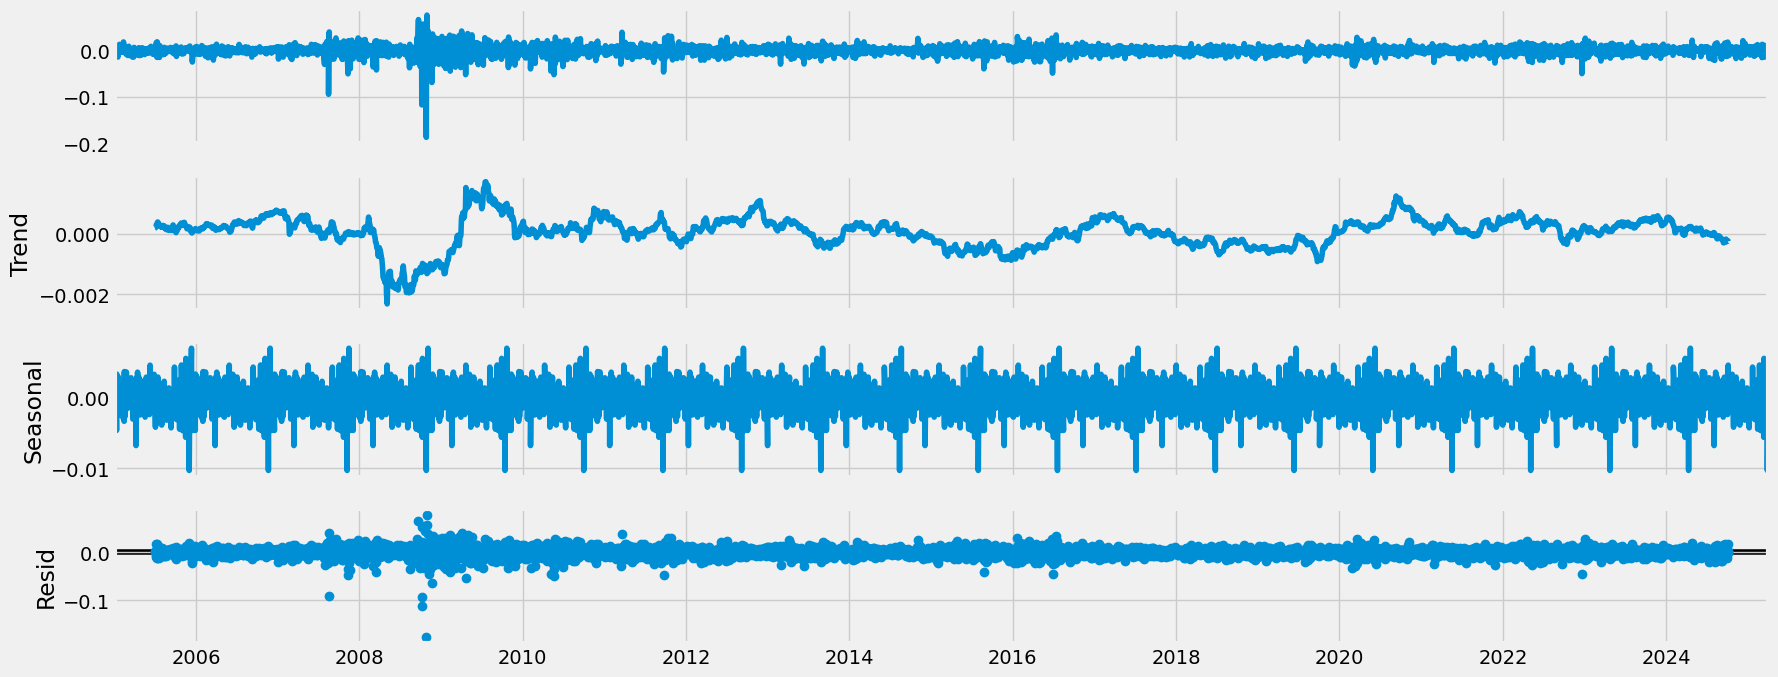

In [683]:
# Note: See comments for steps to the decomposition procedure in the AUDJPY raw data decomposition (above)
# The period selection here returns to 252 (to get annual off a daily data grain)
decomposition_audjpy_logret1 = sm.tsa.seasonal_decompose(audjpy_logret1_bfreq_interp, model='additive', period=252)
rcParams['figure.figsize'] = 18, 7
decomposition_audjpy_logret1.plot()
plt.show()

##### Results similar to the 5-day log return ones, but daily log returns presumably introduce more "noise" compared to 5-day returns (a bit of a smoothing effect there), so we need to see what the stationarity statistical tests indicate.

### 04. Testing for stationarity

### ASX200

#### Check stationarity for the raw data: ASX200 stock index original 

In [563]:
# The adfuller() function will import the model from statsmodels for the test (imported at session start).
# However, running it will only return an array of numbers.
# This is why we need to also define a function that prints the correct output from that array.

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(asx200_orig_bfreq_interp['asx200_idx'])

Dickey-Fuller Stationarity test:
Test Statistic                   -1.481610
p-value                           0.542588
Number of Lags Used              12.000000
Number of Observations Used    5266.000000
Critical Value (1%)              -3.431592
Critical Value (5%)              -2.862089
Critical Value (10%)             -2.567062
dtype: float64


##### As expected, based on the decomposition visuals, the raw data time series is non-stationary.  The Test Statistic -1.48 > Critical Value (5%) -2.86, and p-value 0.54 > 0.05 by a wide margin, which means we cannot reject the Null Hypothesis that the time series has a unit root.  Having a unit root means that the series does not revert to its mean and its fluctuations are not bounded.

#### Check stationarity for the smoothed data: ASX200 stock index 50 SMA (simple moving average, rolling)

In [571]:
# Note: See raw data stationarity test (above) for elaboration on the function here
dickey_fuller(asx200_sma50_bfreq_interp['asx200_idx_sma50'])

Dickey-Fuller Stationarity test:
Test Statistic                   -1.489302
p-value                           0.538797
Number of Lags Used              21.000000
Number of Observations Used    5207.000000
Critical Value (1%)              -3.431606
Critical Value (5%)              -2.862095
Critical Value (10%)             -2.567066
dtype: float64


##### The series is non-stationary.  Smoothing over a trailing, rolling 50-day simple moving average did little to move the needle on statistical improvement.  p-value of 0.538 hardly an improvement on the 0.542 in the raw data time series ADF test.

#### Check stationarity for the smoothed data: ASX200 stock index 30 SMA (simple moving average, rolling)

In [577]:
# Note: See raw data stationarity test (above) for elaboration on the function here
dickey_fuller(asx200_sma30_bfreq_interp['asx200_idx_sma30'])

Dickey-Fuller Stationarity test:
Test Statistic                   -1.367628
p-value                           0.597694
Number of Lags Used              33.000000
Number of Observations Used    5215.000000
Critical Value (1%)              -3.431605
Critical Value (5%)              -2.862094
Critical Value (10%)             -2.567065
dtype: float64


##### The series is non-stationary.  Smoothing over a trailing, rolling 30-day simple moving average gave worse results than for both the raw data and 50-day SMA.  p-value of 0.59 worse (higher) than both 0.542 and 0.538, respectively.

#### Check stationarity for the transformed data: ASX200 stock index 5-day (weekly) log returns

In [585]:
# Note: See raw data stationarity test (above) for elaboration on the function here
dickey_fuller(asx200_logret5_bfreq_interp['asx200_idx_logret5'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.394690e+01
p-value                        4.779262e-26
Number of Lags Used            2.200000e+01
Number of Observations Used    5.251000e+03
Critical Value (1%)           -3.431596e+00
Critical Value (5%)           -2.862091e+00
Critical Value (10%)          -2.567063e+00
dtype: float64


#### Stationary on the ADF test front, but still need to test with ACF (below) for degree of autocorrelation.  The p-value is close to zero and the Test Statistic of -13.9 > either the Critical Value (5%) -2.86 or Critical Value (1%) -3.43.

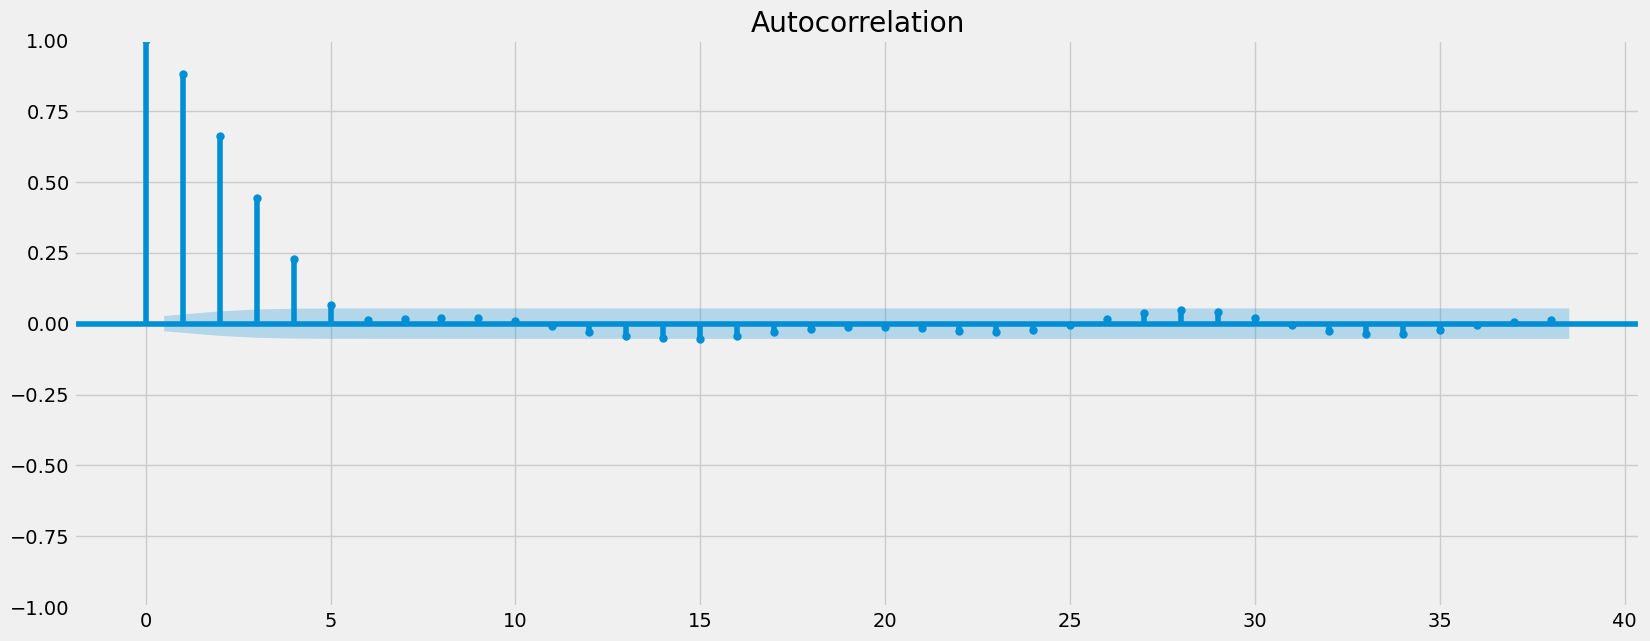

In [593]:
# Check out a plot of autocorrelations
# Note: at session start we imported the autocorrelation and partial correlation plots (below) from statsmodels.graphics.tsaplots

plot_acf(asx200_logret5_bfreq_interp)
plt.show()

##### The time series has low autocorrelation based on the ACF test, where visually we want to see < 10 of the vertical blue lag lines poke out beyond the blue-colored probabiltiy (confidence interval) zone, which is quite compressed here.  Only 6 lines appear to exit the blue zone.

### Outcome: The combination of the Augmented Dickey-Fuller (ADF) stationarity test and the Autocorrelation Function (ACF) autocorrelation test results confirm that we have a stationary time series for the 5-day log return version of the original raw dataset.  (Cue trumpets.)

#### Check stationarity for the transformed data: ASX200 stock index 1-day (daily) log returns

In [587]:
# Note: See raw data stationarity test (above) for elaboration on the function here
dickey_fuller(asx200_logret1_bfreq_interp['asx200_idx_logret1'])

Dickey-Fuller Stationarity test:
Test Statistic                  -20.877846
p-value                           0.000000
Number of Lags Used              11.000000
Number of Observations Used    5266.000000
Critical Value (1%)              -3.431592
Critical Value (5%)              -2.862089
Critical Value (10%)             -2.567062
dtype: float64


#### Stationary on the ADF test front, but still need to test with ACF (below) for degree of autocorrelation.  The p-value is zero and the Test Statistic of -20.8 > either the Critical Value (5%) -2.86 or Critical Value (1%) -3.43.

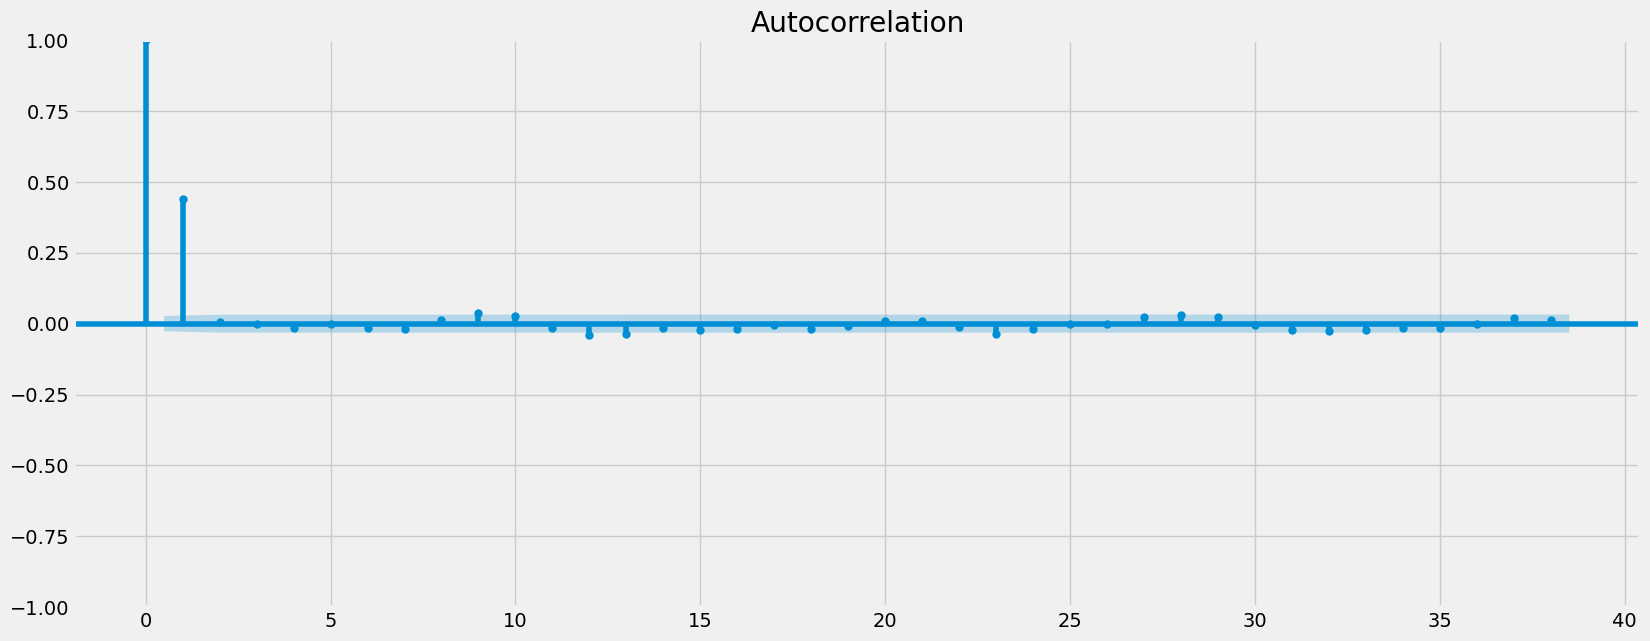

In [600]:
# Check out a plot of autocorrelations
# Note: at session start we imported the autocorrelation and partial correlation plots (below) from statsmodels.graphics.tsaplots

plot_acf(asx200_logret1_bfreq_interp)
plt.show()

##### The time series has minimal autocorrelation based on the ACF test, where visually we want to see < 10 of the vertical blue lag lines poke out beyond the blue-colored probabiltiy (confidence interval) zone, which is quite compressed here.  Only 2 lines appear to exit the blue zone (at least, materially); if true, an impressive result.

### Outcome: The combination of the Augmented Dickey-Fuller (ADF) stationarity test and the Autocorrelation Function (ACF) autocorrelation test results confirm that we have a stationary time series for the 1-day log return version of the original raw dataset.  The results are even stronger than for the 5-day log returns.  (Cue bagpipes.)

### AUDJPY

#### Check stationarity for the raw data: AUDJPY original 

In [693]:
# Note: See raw data stationarity test for ASX200 (above) for elaboration on the function here
dickey_fuller(audjpy_orig_bfreq_interp['aud_jpy'])

Dickey-Fuller Stationarity test:
Test Statistic                   -2.912641
p-value                           0.043898
Number of Lags Used              23.000000
Number of Observations Used    5255.000000
Critical Value (1%)              -3.431595
Critical Value (5%)              -2.862090
Critical Value (10%)             -2.567063
dtype: float64


#### "Barely" stationary on the ADF test front, but still need to test with ACF (below) for degree of autocorrelation.  The p-value 0.043 < 0.05 and the Test Statistic of -2.91 > Critical Value (5%) -2.86.

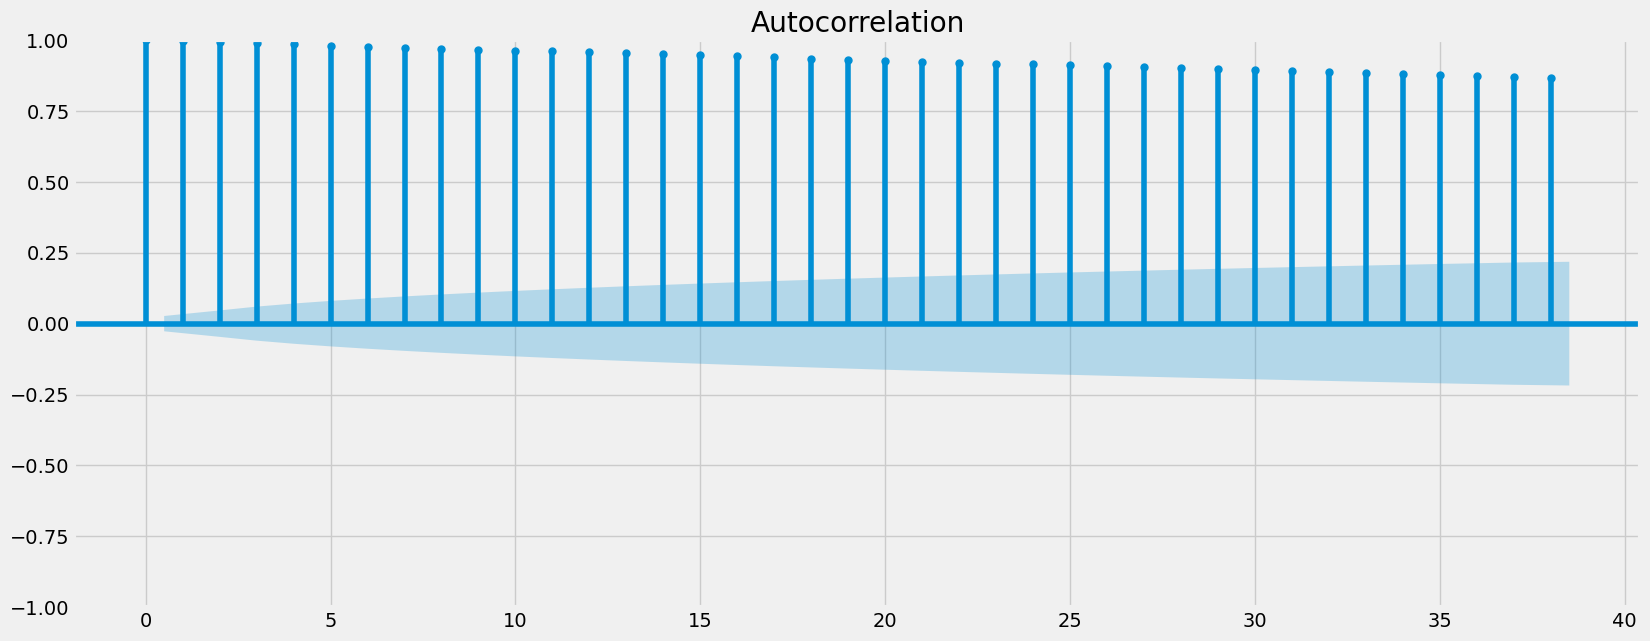

In [698]:
# Check out a plot of autocorrelations
# Note: at session start we imported the autocorrelation and partial correlation plots (below) from statsmodels.graphics.tsaplots

plot_acf(audjpy_orig_bfreq_interp)
plt.show()

##### Decidedly non-stationary.  Every time lag vertical line (far > 10 lines) exits the blue "confidence interval" zone.  AUDJPY raw time series data is highly autocorrelated, with almost Swiss watch-like precision.

#### Check stationarity for the smoothed data: AUDJPY 50 SMA (simple moving average, rolling)

In [707]:
# Note: See raw data stationarity test for ASX200 (above) for elaboration on the function here
dickey_fuller(audjpy_sma50_bfreq_interp['audjpy_sma50'])

Dickey-Fuller Stationarity test:
Test Statistic                   -3.980340
p-value                           0.001517
Number of Lags Used              10.000000
Number of Observations Used    5218.000000
Critical Value (1%)              -3.431604
Critical Value (5%)              -2.862094
Critical Value (10%)             -2.567065
dtype: float64


#### Stationary on the ADF test front, but still need to test with ACF (below) for degree of autocorrelation.  The p-value 0.001 < 0.05 and the Test Statistic of -3.98 > both the Critical Value (5%) -2.86 and the Critical Value (1%) -3.43.

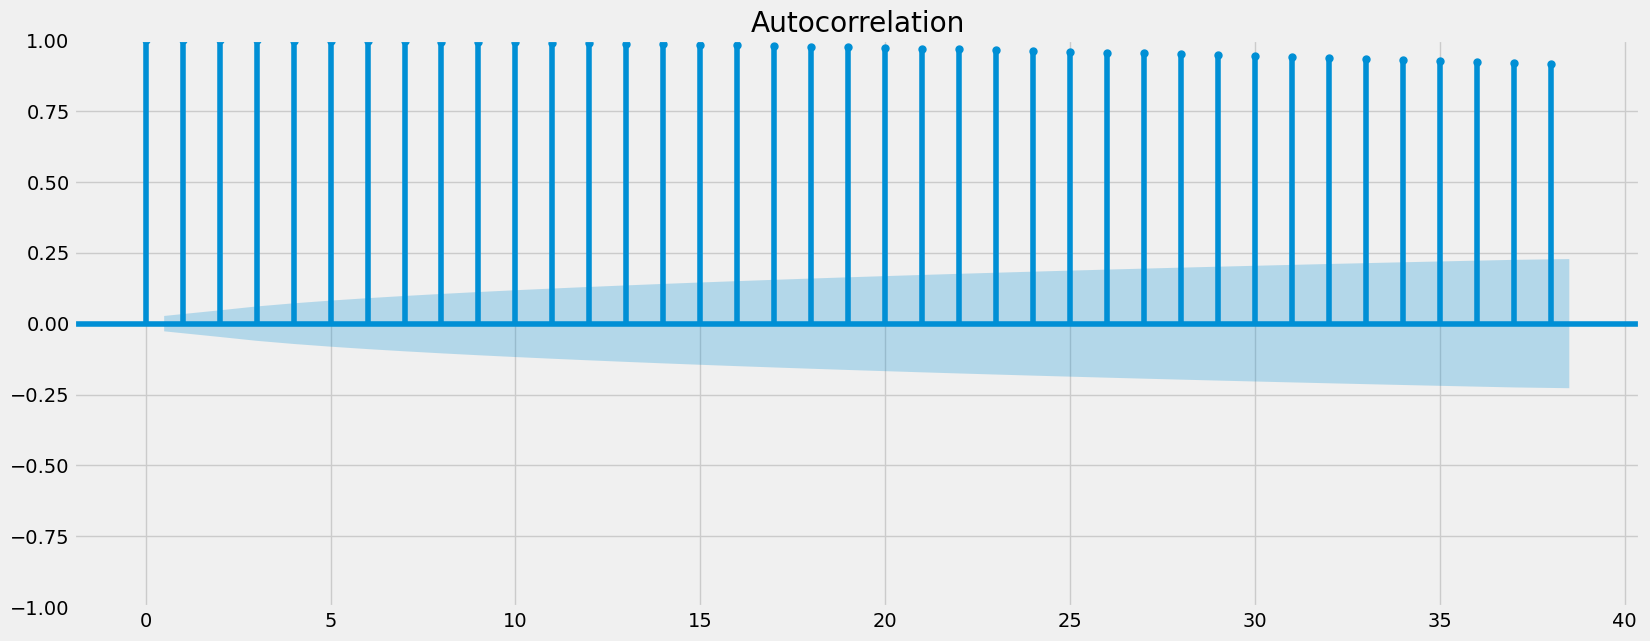

In [712]:
# Check out a plot of autocorrelations
plot_acf(audjpy_sma50_bfreq_interp)
plt.show()

##### Smoothing had no impact on the autocorrelation aspect of the data.  Same result as for the raw data.  Non-stationary due the very high autocorrelation present, on all time lags here.

#### Check stationarity for the smoothed data: AUDJPY 30 SMA (simple moving average, rolling)

#### _Comment: we will skip the tests for the 30 SMA version of the raw data, because these will end up somewhere between the 50 SMA and the raw data results. Specifically, we would see a high level of autocorrelation present in the smoothed data._

#### Check stationarity for the transformed data: AUDJPY 5-day (weekly) log returns

In [726]:
# Note: See raw data stationarity test for ASX200 (above) for elaboration on the function here
dickey_fuller(audjpy_logret5_bfreq_interp['audjpy_logret5'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.189959e+01
p-value                        5.616126e-22
Number of Lags Used            3.000000e+01
Number of Observations Used    5.243000e+03
Critical Value (1%)           -3.431598e+00
Critical Value (5%)           -2.862091e+00
Critical Value (10%)          -2.567064e+00
dtype: float64


#### Stationary on the ADF test front, but still need to test with ACF (below) for degree of autocorrelation.  The p-value is close to zero and the Test Statistic of -11.9 > either the Critical Value (5%) -2.86 or Critical Value (1%) -3.43.

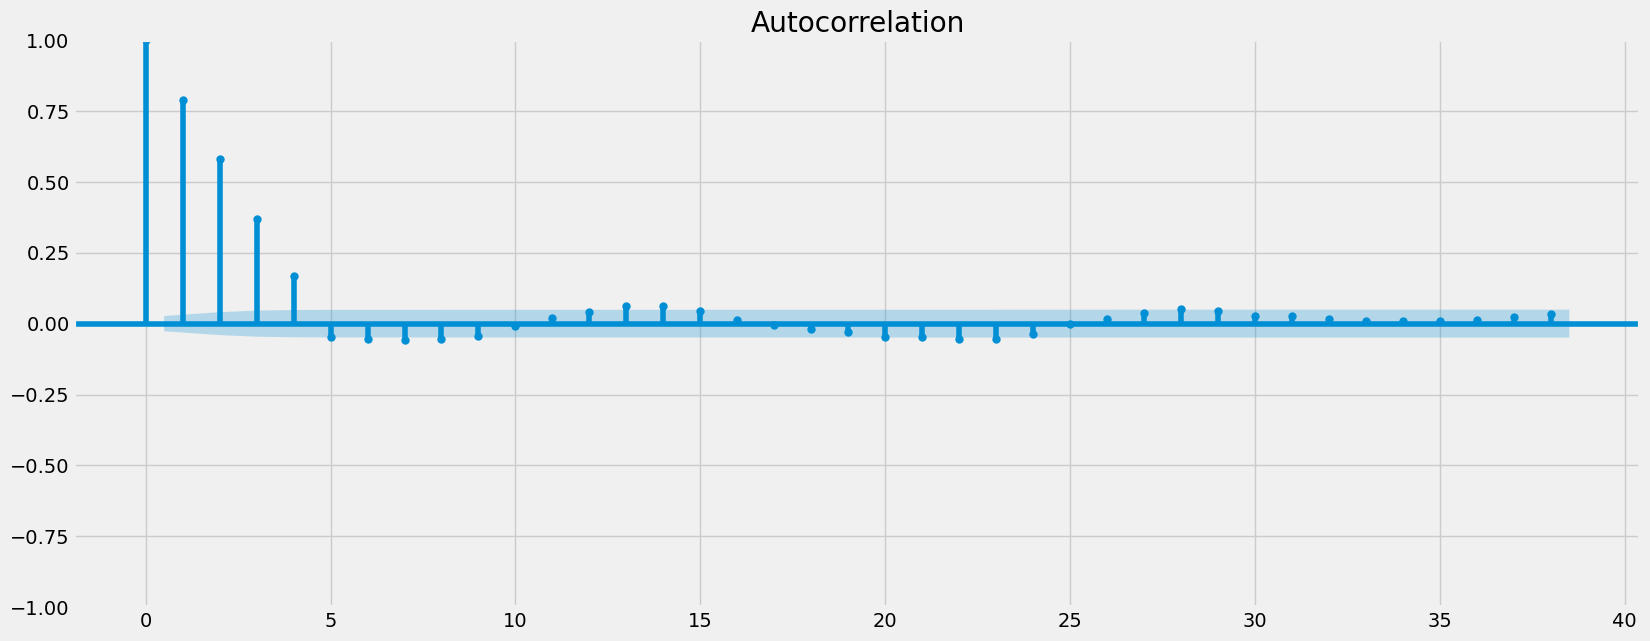

In [730]:
# Check out a plot of autocorrelations
plot_acf(audjpy_logret5_bfreq_interp)
plt.show()

##### The time series has low autocorrelation based on the ACF test, where visually we want to see < 10 of the vertical blue lag lines poke out beyond the blue-colored probabiltiy (confidence interval) zone, which is quite compressed here.  Only 4 lines appear to exit the blue zone, at least materially.

### Outcome: The combination of the Augmented Dickey-Fuller (ADF) stationarity test and the Autocorrelation Function (ACF) autocorrelation test results confirm that we have a stationary time series for the 5-day log return version of the original raw dataset.

#### Check stationarity for the transformed data: AUDJPY 1-day (weekly) log returns

In [739]:
# Note: See raw data stationarity test for ASX200 (above) for elaboration on the function here
dickey_fuller(audjpy_logret1_bfreq_interp['audjpy_logret1'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.570788e+01
p-value                        1.370847e-28
Number of Lags Used            2.300000e+01
Number of Observations Used    5.254000e+03
Critical Value (1%)           -3.431595e+00
Critical Value (5%)           -2.862090e+00
Critical Value (10%)          -2.567063e+00
dtype: float64


#### Stationary on the ADF test front, but still need to test with ACF (below) for degree of autocorrelation.  The p-value is close to zero (and better than the 5-day log returns p-value) and the Test Statistic of -15.7 > either the Critical Value (5%) -2.86 or Critical Value (1%) -3.43.

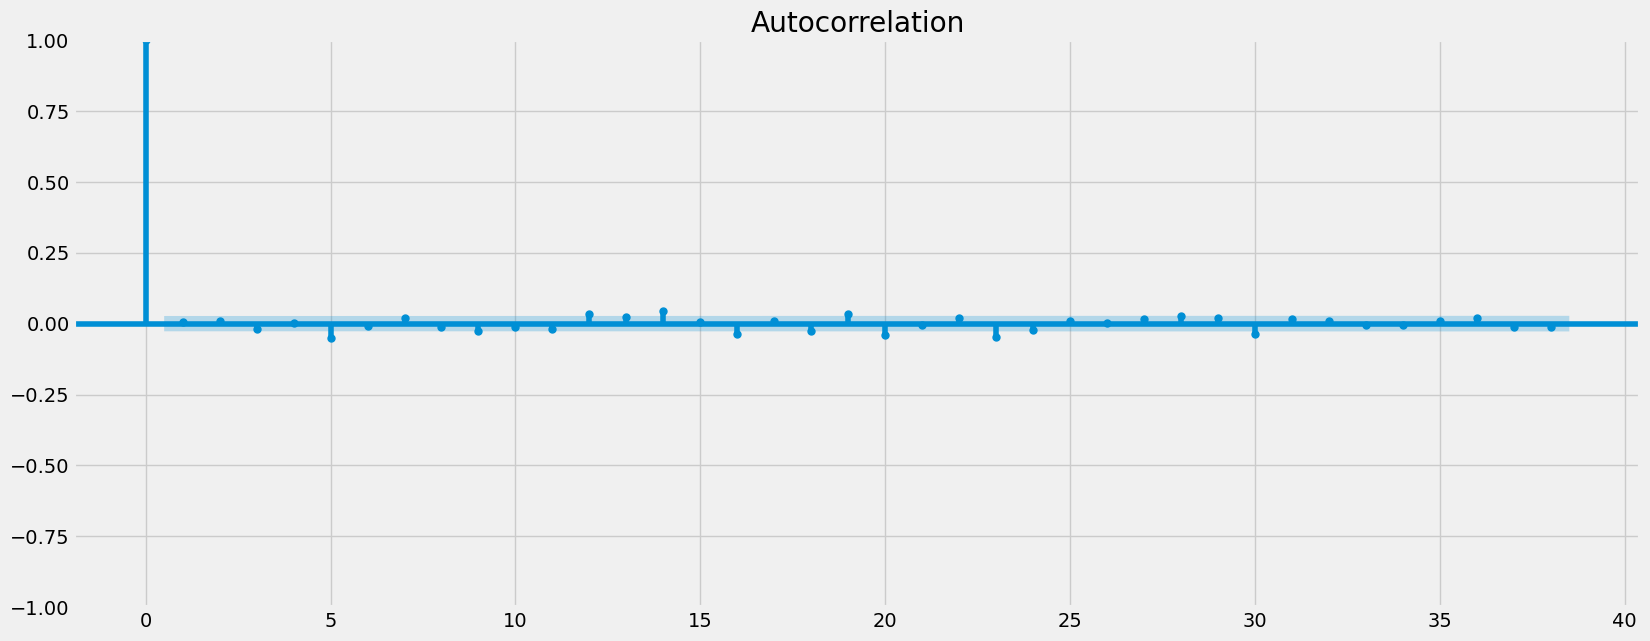

In [746]:
# Check out a plot of autocorrelations
plot_acf(audjpy_logret1_bfreq_interp)
plt.show()

##### The time series has minimal autocorrelation based on the ACF test, where visually we want to see < 10 of the vertical blue lag lines poke out beyond the blue-colored probabiltiy (confidence interval) zone, which is quite compressed here.  Only 1 line appears to exit the blue zone (at least, materially); if true, an impressive result.

### Outcome: The combination of the Augmented Dickey-Fuller (ADF) stationarity test and the Autocorrelation Function (ACF) autocorrelation test results confirm that we have a stationary time series for the 1-day log return version of the original raw dataset.  The results are even stronger than for the 5-day log returns.  Also, similar to the 1-day log return results for a different variable, the ASX200 stock index.

### 05. Stationarizing ASX200 stock market index and AUDJPY FX time series data

#### Comment: stationarization is not needed at this point.  This is because both 5-day and 1-day log return transformations of the original daily raw data for the ASX200 stock index and AUDJPY FX cross-rate variables are stationary time series.  Taking log returns of the data (in our case, the natural logarithm, e.g. base "e") is one stationarization method; another is differencing.  Sometimes these are combined, when the data is challenging to stationarize.

#### Due the strength of the stationarity profile for the 1-day log returns of both variables, ASX200 and AUDJPY, these transformed time series will be used for forecasting purposes (e.g. ARIMA algorithm or other models) over the 5-day log return versions.

#### The 1-day log return transformed data is ready for forecasting, because: (1) ADF test passed, which signifies mean-reversion and constant variance were achieved; (2) ACF low beyond lag 0-1 implies minimal serial correlation, which is ideal for ARIMA modeling (for example); (3) long time span of the dataset, at over 5,000 time series data values, has enough observations to train robust models; and (4) No NaN values in the data, these were cleaned up with the "asfreq('B')" + "ffill()" methods.

### 06. Bonus Task

### ARIMA forecasting

#### ASX200

#### 06.01 Define your parameters

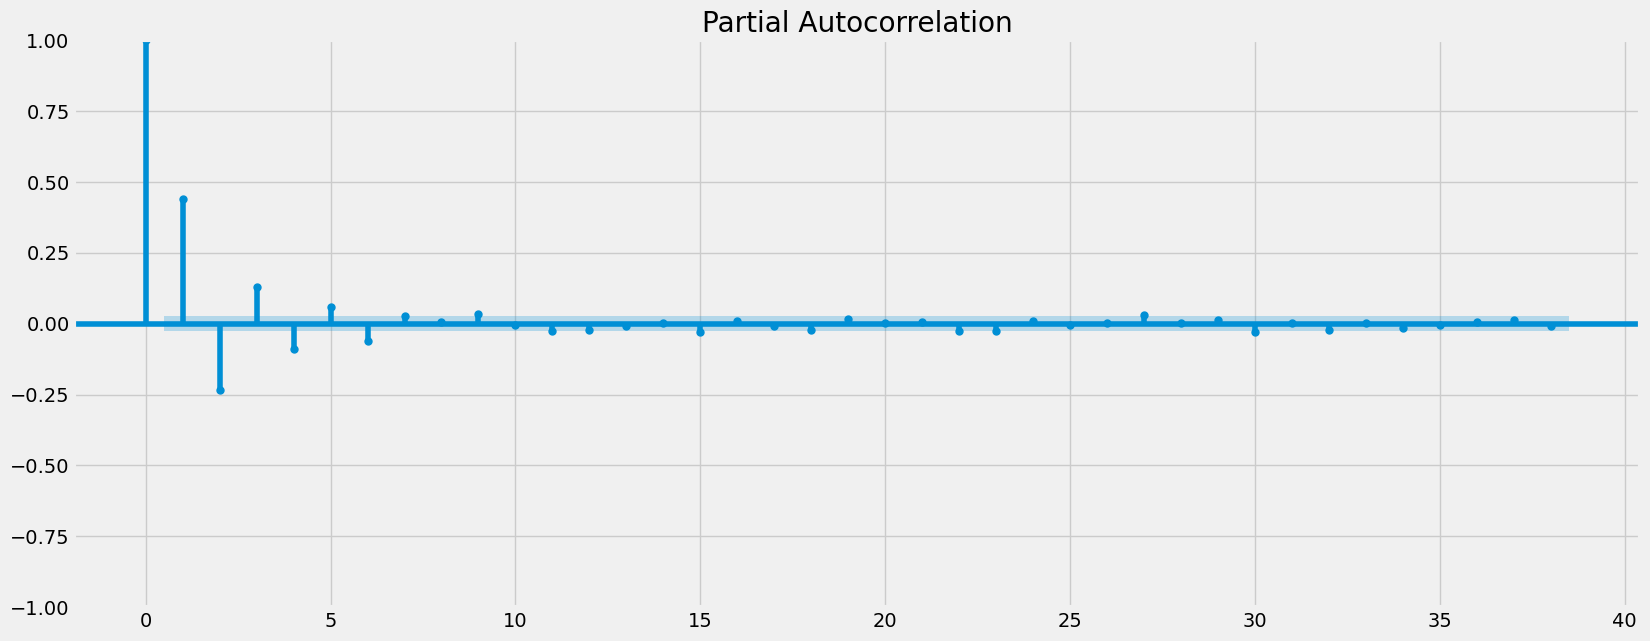

<Figure size 4500x4500 with 0 Axes>

In [764]:
# Plot partial autocorrelations to determine parameter p

plot_pacf(asx200_logret1_bfreq_interp)
plt.figure(figsize=(15,15), dpi=300)
plt.show()

#### We will start with p = 4 (AR terms), to capture the significant partial autocorrelations.

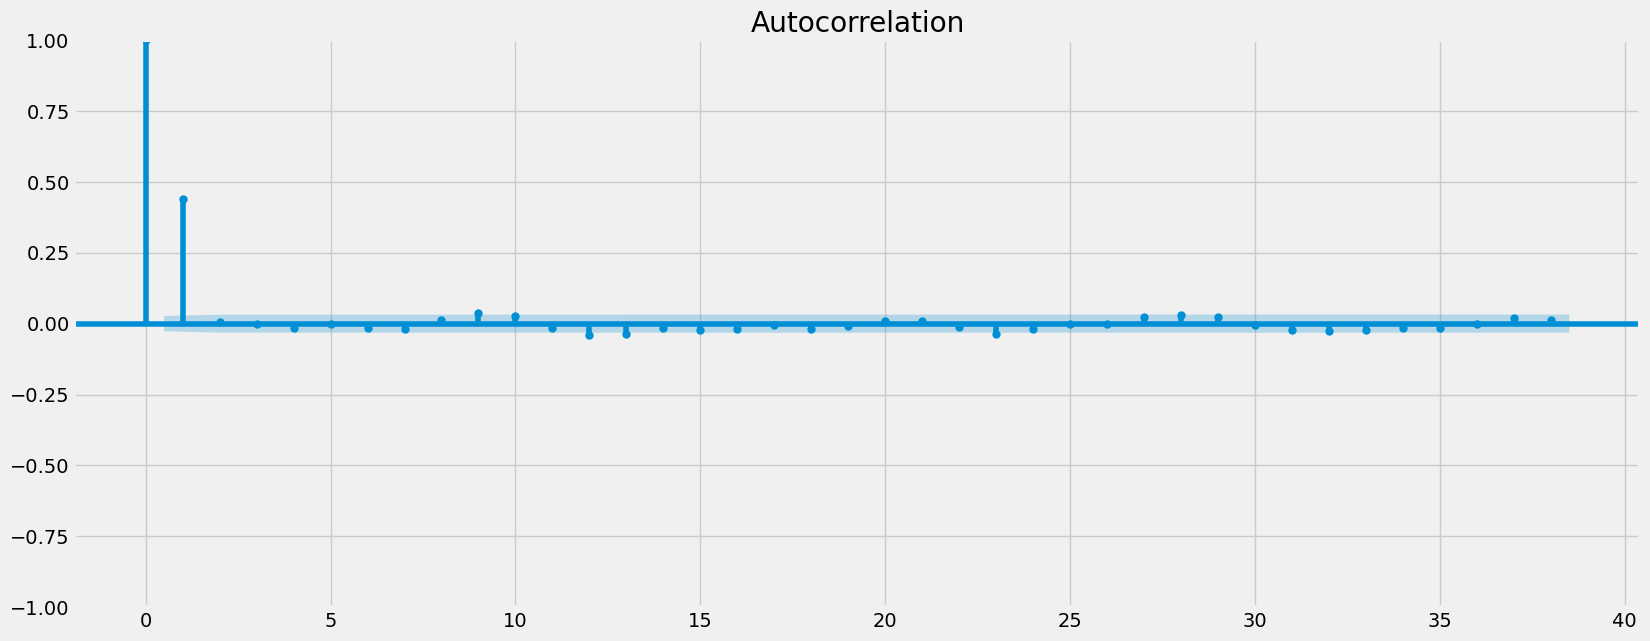

<Figure size 1500x500 with 0 Axes>

In [767]:
# Plot autocorrelations to determine parameter q

plot_acf(asx200_logret1_bfreq_interp)
plt.figure(figsize=(15,5), dpi=100)
plt.show()

#### We will start with q = 2 (MA terms), to capture the significant autocorrelations, and it's a small number to start with.

#### 06.02 Splitting the data

In [781]:
# Split the data

train_asx200 = asx200_logret1_bfreq_interp['asx200_idx_logret1'][:5027]
test_asx200 = asx200_logret1_bfreq_interp['asx200_idx_logret1'][5026:]

##### Comment: this is intentionally a very high proportion training set at a ~ 95/5 split. Split selection was based on web searches suggesting that for the type of financial time series data examined here, the normal 70/30 or 80/20 rule-of-thumb split need not apply.  It is fine, apparently, to use 19+ years of such data to forecast 1 year out (~ 252 business days) with the ARIMA model.

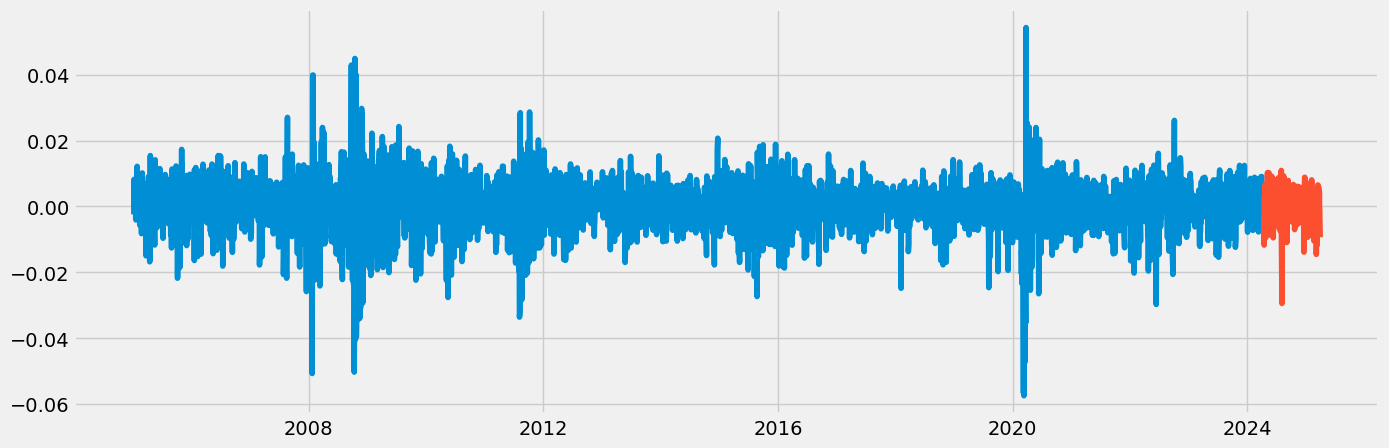

In [791]:
# Plot both sets in order to see the split

plt.figure(figsize=(15,5), dpi=100)
plt.plot(train_asx200)
plt.plot(test_asx200)

#### 06.03 Running and fitting the model

#### Run #1 : p=4, d=1, q=2

                               SARIMAX Results                                
Dep. Variable:     asx200_idx_logret1   No. Observations:                 5027
Model:                 ARIMA(4, 1, 2)   Log Likelihood               18229.999
Date:                Fri, 13 Jun 2025   AIC                         -36445.999
Time:                        23:03:53   BIC                         -36400.342
Sample:                    01-06-2005   HQIC                        -36430.001
                         - 04-12-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3228      0.021    -15.633      0.000      -0.363      -0.282
ar.L2          0.2019      0.015     13.588      0.000       0.173       0.231
ar.L3         -0.1297      0.011    -11.667      0.0

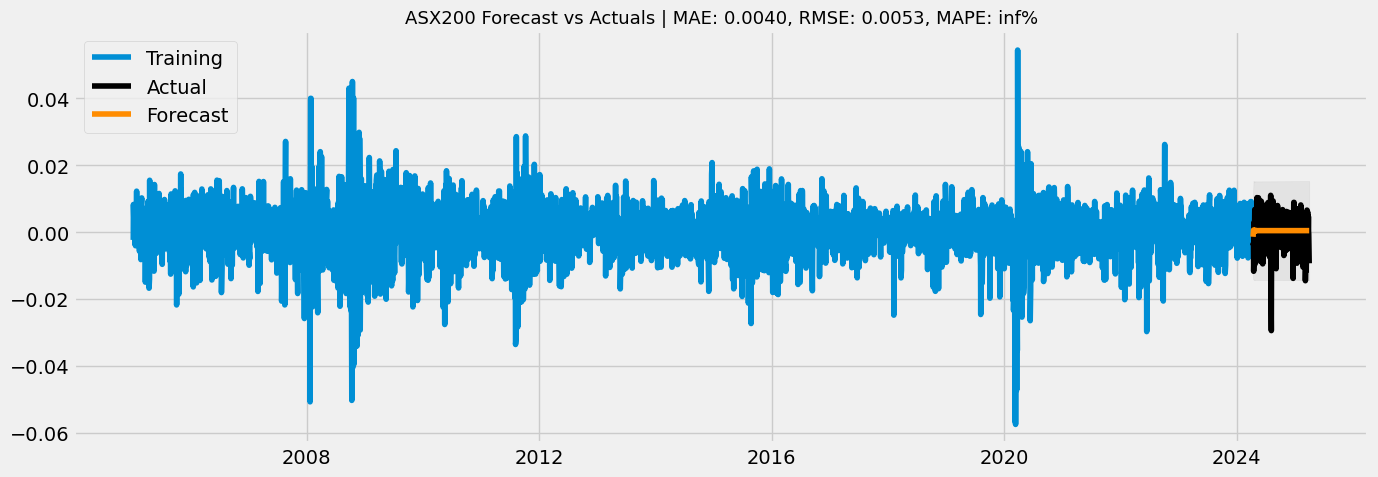

In [810]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Fit ARIMA model
model = ARIMA(train_asx200, order=(4, 1, 2))  
fitted = model.fit()
print(fitted.summary()) # Check model summary

# Forecast
n_forecast = len(test_asx200)
fc = fitted.get_forecast(steps=n_forecast)
fc_series = fc.predicted_mean
conf = fc.conf_int(alpha=0.05)

# Reindex forecast and confidence intervals
fc_series.index = test_asx200.index
conf.index = test_asx200.index
lower_series = conf.iloc[:, 0]
upper_series = conf.iloc[:, 1]

# Residuals
residuals = test_asx200 - fc_series

# Error metrics
mae = mean_absolute_error(test_asx200, fc_series)
rmse = np.sqrt(mean_squared_error(test_asx200, fc_series))
mape = np.mean(np.abs(residuals / test_asx200)) * 100  # In percent

# Plot forecast vs actuals
plt.figure(figsize=(14, 5), dpi=100)
plt.plot(train_asx200, label='Training')
plt.plot(test_asx200, label='Actual', color='black')
plt.plot(fc_series, label='Forecast', color='darkorange')
plt.fill_between(fc_series.index, lower_series, upper_series, color='k', alpha=.05)

plt.title(f'ASX200 Forecast vs Actuals | MAE: {mae:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.2f}%', fontsize=13)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

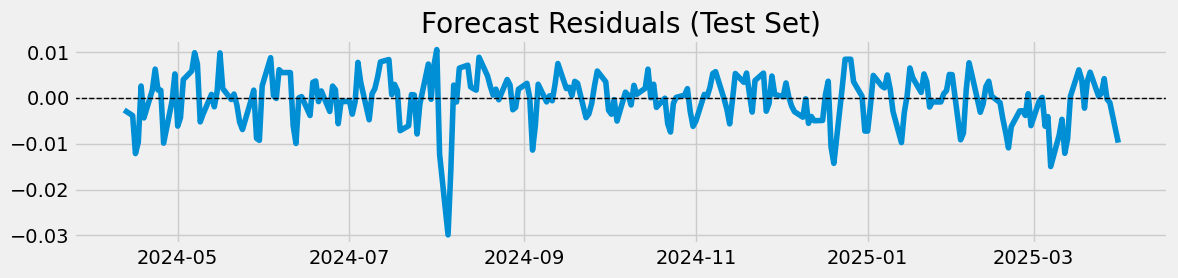

In [804]:
# Plot the residuals

plt.figure(figsize=(12, 3))
plt.plot(residuals)
plt.axhline(y=0, color='black', linestyle='--', lw=1)
plt.title('Forecast Residuals (Test Set)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### These are reasonably good overall results for model fit, with some nitpicking due to the inherent nature of this type of financial log return data (fat tails, heavy kurtosis, some heteroskedasticity).  Nonetheless, running some iterations of AR / MA coefficient combinations to see whether I can reduce MAE/RMSE, AIC/BIC, higher Ljung-Box p-value (closer to 1 better than 0.74 on this run). without degrading the Residuals Plot performance.  A goal is "white noise" for residuals but that likely requires a different model from ARIMA, based on what we're seeing here and the nature of this type of data.

#### Run #2 : p=3, d=1, q=2

                               SARIMAX Results                                
Dep. Variable:     asx200_idx_logret1   No. Observations:                 5027
Model:                 ARIMA(3, 1, 2)   Log Likelihood               18215.577
Date:                Fri, 13 Jun 2025   AIC                         -36419.155
Time:                        23:18:06   BIC                         -36380.021
Sample:                    01-06-2005   HQIC                        -36405.443
                         - 04-12-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3322      0.018    -18.617      0.000      -0.367      -0.297
ar.L2          0.2099      0.013     16.423      0.000       0.185       0.235
ar.L3         -0.1417      0.010    -13.851      0.0

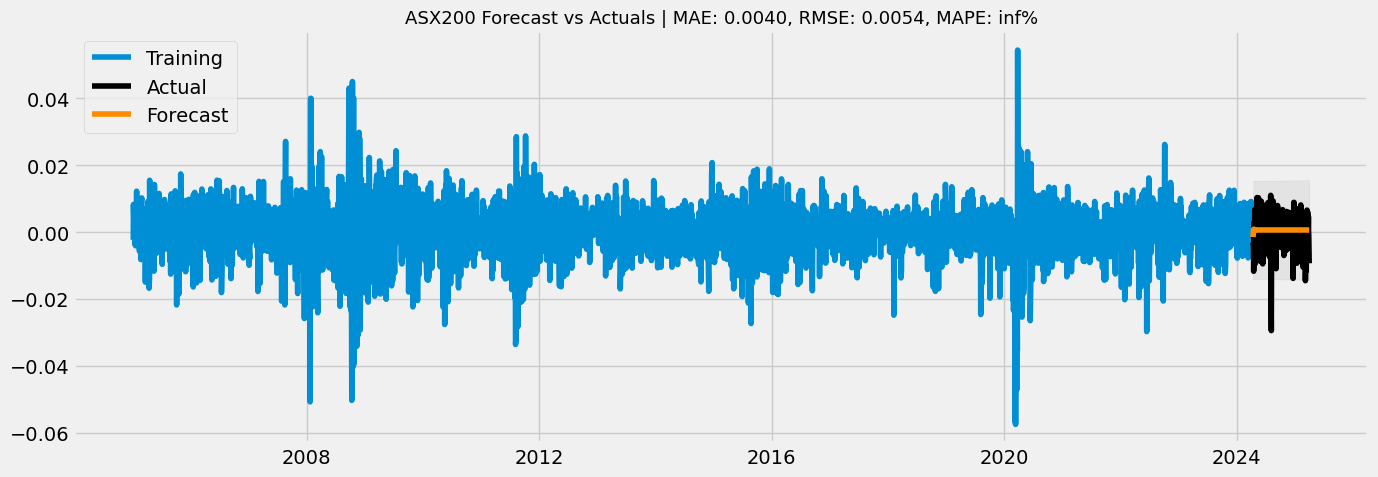

In [818]:
# Fit ARIMA model
model = ARIMA(train_asx200, order=(3, 1, 2))  
fitted = model.fit()
print(fitted.summary()) # Check model summary

# Forecast
n_forecast = len(test_asx200)
fc = fitted.get_forecast(steps=n_forecast)
fc_series = fc.predicted_mean
conf = fc.conf_int(alpha=0.05)

# Reindex forecast and confidence intervals
fc_series.index = test_asx200.index
conf.index = test_asx200.index
lower_series = conf.iloc[:, 0]
upper_series = conf.iloc[:, 1]

# Residuals
residuals = test_asx200 - fc_series

# Error metrics
mae = mean_absolute_error(test_asx200, fc_series)
rmse = np.sqrt(mean_squared_error(test_asx200, fc_series))
mape = np.mean(np.abs(residuals / test_asx200)) * 100  # In percent

# Plot forecast vs actuals
plt.figure(figsize=(14, 5), dpi=100)
plt.plot(train_asx200, label='Training')
plt.plot(test_asx200, label='Actual', color='black')
plt.plot(fc_series, label='Forecast', color='darkorange')
plt.fill_between(fc_series.index, lower_series, upper_series, color='k', alpha=.05)

plt.title(f'ASX200 Forecast vs Actuals | MAE: {mae:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.2f}%', fontsize=13)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

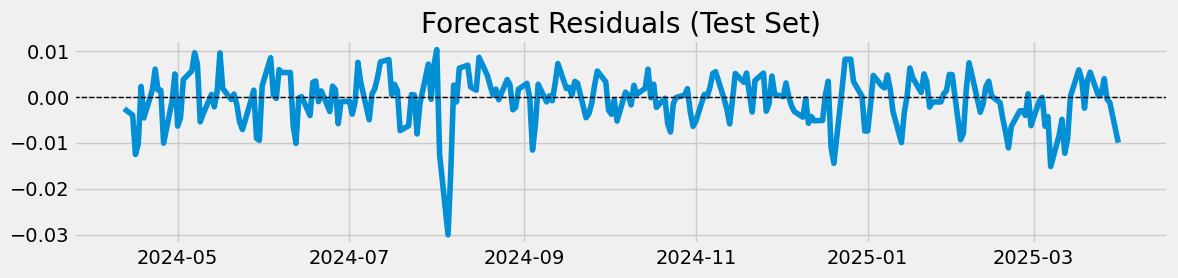

In [820]:
# Plot the residuals

plt.figure(figsize=(12, 3))
plt.plot(residuals)
plt.axhline(y=0, color='black', linestyle='--', lw=1)
plt.title('Forecast Residuals (Test Set)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Slight improvement on AIC/BIC (e.g. lower), MAE/RMSE similar, residuals appear slightly better, Ljung-Box worse (0.74 dropped to 0.41), heterskedasticity unchanged at 0.58.  Overall, slightly better fit.

#### Run #3 : p=4, d=1, q=1

                               SARIMAX Results                                
Dep. Variable:     asx200_idx_logret1   No. Observations:                 5027
Model:                 ARIMA(4, 1, 1)   Log Likelihood               17882.086
Date:                Fri, 13 Jun 2025   AIC                         -35752.171
Time:                        23:30:57   BIC                         -35713.037
Sample:                    01-06-2005   HQIC                        -35738.459
                         - 04-12-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0591      0.032     -1.870      0.062      -0.121       0.003
ar.L2         -0.4870      0.010    -48.995      0.000      -0.506      -0.468
ar.L3         -0.1005      0.015     -6.602      0.0

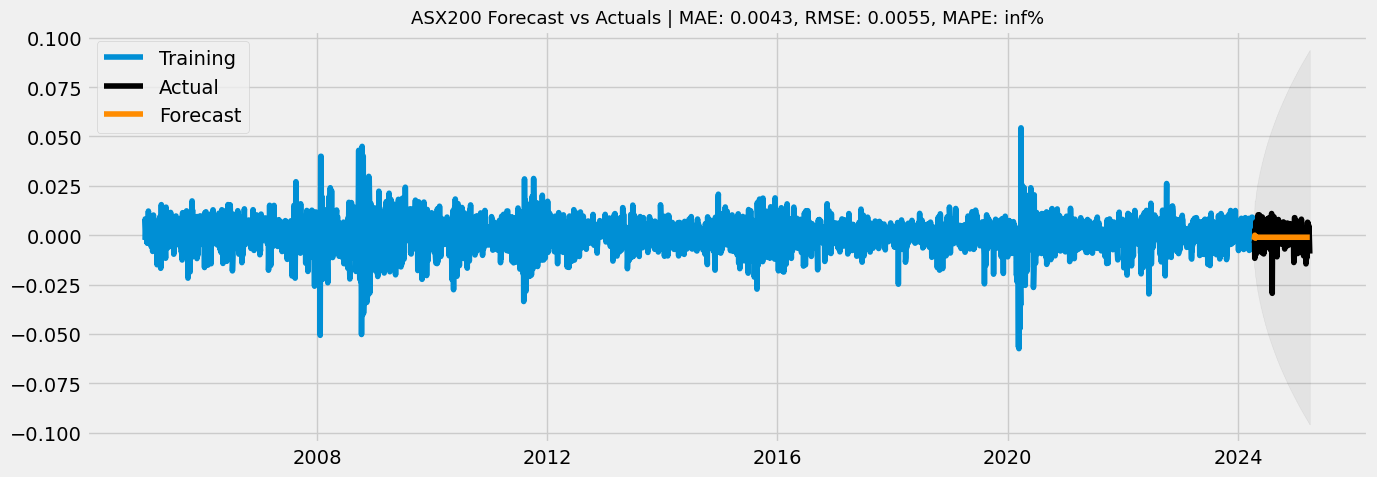

In [831]:
# Fit ARIMA model
model = ARIMA(train_asx200, order=(4, 1, 1))  
fitted = model.fit()
print(fitted.summary()) # Check model summary

# Forecast
n_forecast = len(test_asx200)
fc = fitted.get_forecast(steps=n_forecast)
fc_series = fc.predicted_mean
conf = fc.conf_int(alpha=0.05)

# Reindex forecast and confidence intervals
fc_series.index = test_asx200.index
conf.index = test_asx200.index
lower_series = conf.iloc[:, 0]
upper_series = conf.iloc[:, 1]

# Residuals
residuals = test_asx200 - fc_series

# Error metrics
mae = mean_absolute_error(test_asx200, fc_series)
rmse = np.sqrt(mean_squared_error(test_asx200, fc_series))
mape = np.mean(np.abs(residuals / test_asx200)) * 100  # In percent

# Plot forecast vs actuals
plt.figure(figsize=(14, 5), dpi=100)
plt.plot(train_asx200, label='Training')
plt.plot(test_asx200, label='Actual', color='black')
plt.plot(fc_series, label='Forecast', color='darkorange')
plt.fill_between(fc_series.index, lower_series, upper_series, color='k', alpha=.05)

plt.title(f'ASX200 Forecast vs Actuals | MAE: {mae:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.2f}%', fontsize=13)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

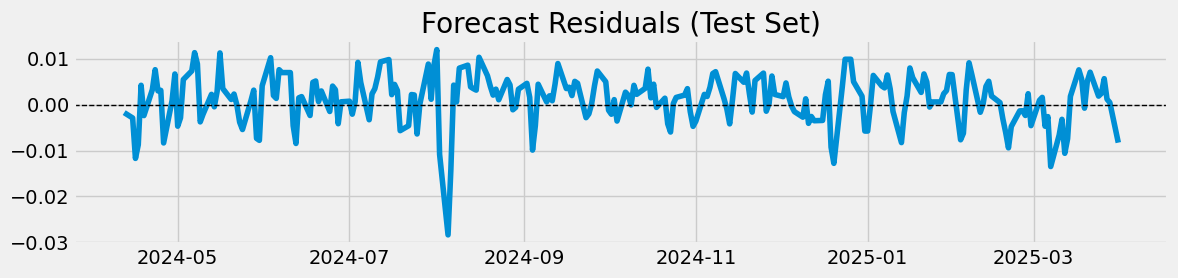

In [833]:
# Plot the residuals

plt.figure(figsize=(12, 3))
plt.plot(residuals)
plt.axhline(y=0, color='black', linestyle='--', lw=1)
plt.title('Forecast Residuals (Test Set)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### AIC/BIC lower (improved) but MAE/RMSE climbed (worse), Ljung-Box p-value < 0.05 (bad, introduced some autocorrelation in residuals), heteroskedasticity improved modestly (0.58 dropped to 0.56), residuals visually not much changed and ar.L1 coefficient p > |z| of 0.062 (eg > 0.05) not good.  So this run pushed the model to a worse fit.

#### Run #4 : p=3, d=1, q=3

                               SARIMAX Results                                
Dep. Variable:     asx200_idx_logret1   No. Observations:                 5027
Model:                 ARIMA(3, 1, 3)   Log Likelihood               18123.080
Date:                Fri, 13 Jun 2025   AIC                         -36232.160
Time:                        23:40:46   BIC                         -36186.503
Sample:                    01-06-2005   HQIC                        -36216.162
                         - 04-12-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6835      0.587     -1.165      0.244      -1.833       0.466
ar.L2          0.0199      0.020      1.010      0.313      -0.019       0.058
ar.L3          0.0321      0.018      1.791      0.0

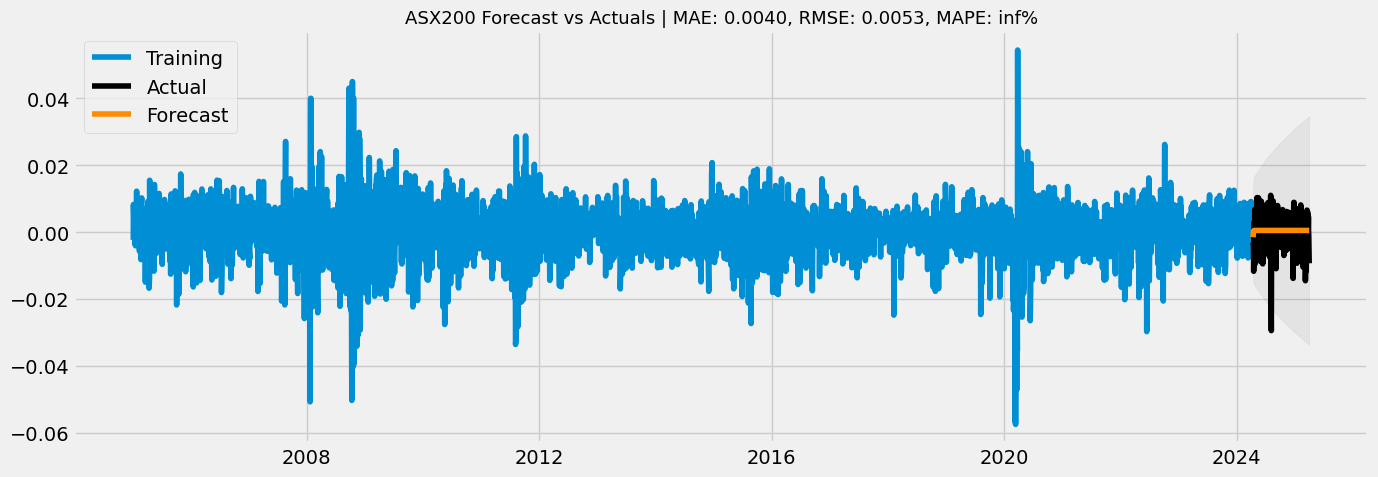

In [838]:
# Fit ARIMA model
model = ARIMA(train_asx200, order=(3, 1, 3))  
fitted = model.fit()
print(fitted.summary()) # Check model summary

# Forecast
n_forecast = len(test_asx200)
fc = fitted.get_forecast(steps=n_forecast)
fc_series = fc.predicted_mean
conf = fc.conf_int(alpha=0.05)

# Reindex forecast and confidence intervals
fc_series.index = test_asx200.index
conf.index = test_asx200.index
lower_series = conf.iloc[:, 0]
upper_series = conf.iloc[:, 1]

# Residuals
residuals = test_asx200 - fc_series

# Error metrics
mae = mean_absolute_error(test_asx200, fc_series)
rmse = np.sqrt(mean_squared_error(test_asx200, fc_series))
mape = np.mean(np.abs(residuals / test_asx200)) * 100  # In percent

# Plot forecast vs actuals
plt.figure(figsize=(14, 5), dpi=100)
plt.plot(train_asx200, label='Training')
plt.plot(test_asx200, label='Actual', color='black')
plt.plot(fc_series, label='Forecast', color='darkorange')
plt.fill_between(fc_series.index, lower_series, upper_series, color='k', alpha=.05)

plt.title(f'ASX200 Forecast vs Actuals | MAE: {mae:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.2f}%', fontsize=13)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

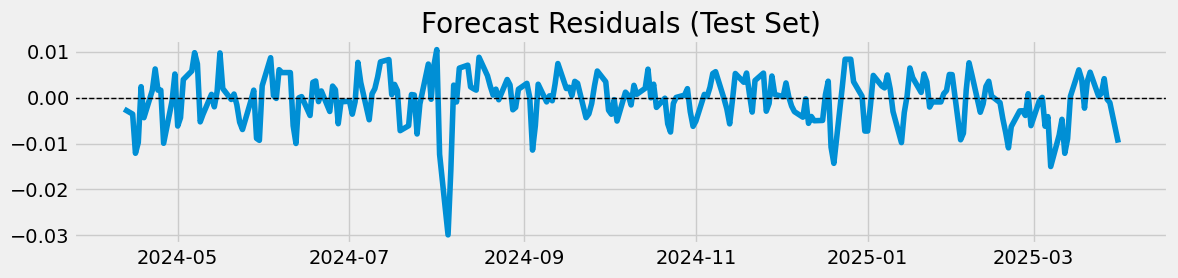

In [840]:
# Plot the residuals

plt.figure(figsize=(12, 3))
plt.plot(residuals)
plt.axhline(y=0, color='black', linestyle='--', lw=1)
plt.title('Forecast Residuals (Test Set)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### This run turned several AR / MA coefficients above 0.05 (not good), Ljung-Box p-value of 0 (not good), residuals appear slightly worse: net-net, model fit worsened.

#### Run #5 : p=5, d=1, q=2

                               SARIMAX Results                                
Dep. Variable:     asx200_idx_logret1   No. Observations:                 5027
Model:                 ARIMA(5, 1, 2)   Log Likelihood               18115.699
Date:                Fri, 13 Jun 2025   AIC                         -36215.398
Time:                        23:50:25   BIC                         -36163.219
Sample:                    01-06-2005   HQIC                        -36197.115
                         - 04-12-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1351      0.029     -4.621      0.000      -0.192      -0.078
ar.L2          0.0960      0.018      5.238      0.000       0.060       0.132
ar.L3         -0.0507      0.015     -3.359      0.0

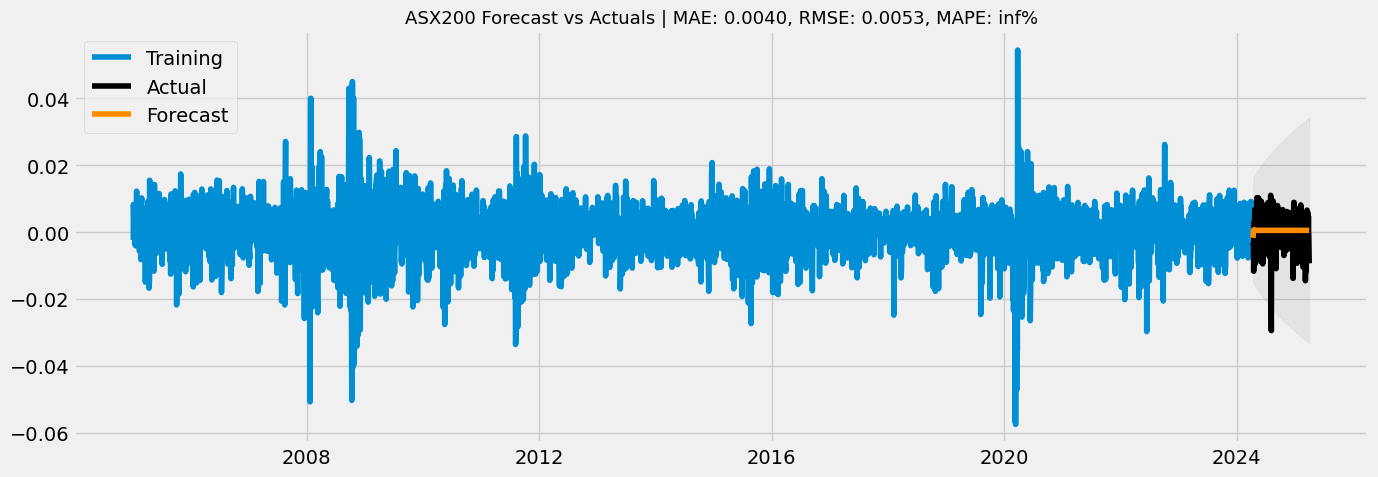

In [848]:
# Fit ARIMA model
model = ARIMA(train_asx200, order=(5, 1, 2))  
fitted = model.fit()
print(fitted.summary()) # Check model summary

# Forecast
n_forecast = len(test_asx200)
fc = fitted.get_forecast(steps=n_forecast)
fc_series = fc.predicted_mean
conf = fc.conf_int(alpha=0.05)

# Reindex forecast and confidence intervals
fc_series.index = test_asx200.index
conf.index = test_asx200.index
lower_series = conf.iloc[:, 0]
upper_series = conf.iloc[:, 1]

# Residuals
residuals = test_asx200 - fc_series

# Error metrics
mae = mean_absolute_error(test_asx200, fc_series)
rmse = np.sqrt(mean_squared_error(test_asx200, fc_series))
mape = np.mean(np.abs(residuals / test_asx200)) * 100  # In percent

# Plot forecast vs actuals
plt.figure(figsize=(14, 5), dpi=100)
plt.plot(train_asx200, label='Training')
plt.plot(test_asx200, label='Actual', color='black')
plt.plot(fc_series, label='Forecast', color='darkorange')
plt.fill_between(fc_series.index, lower_series, upper_series, color='k', alpha=.05)

plt.title(f'ASX200 Forecast vs Actuals | MAE: {mae:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.2f}%', fontsize=13)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

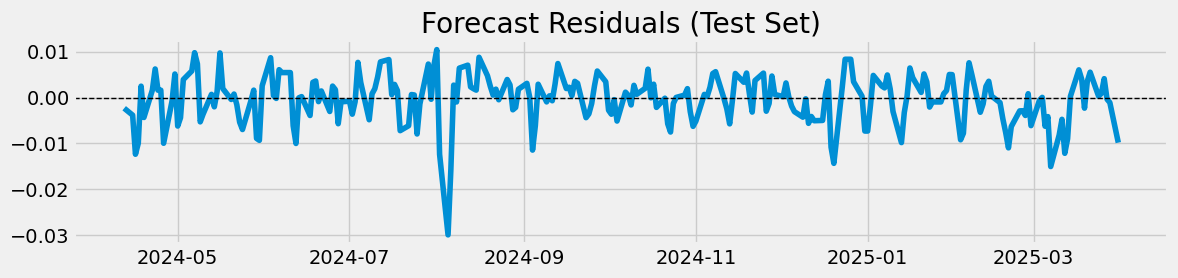

In [850]:
# Plot the residuals

plt.figure(figsize=(12, 3))
plt.plot(residuals)
plt.axhline(y=0, color='black', linestyle='--', lw=1)
plt.title('Forecast Residuals (Test Set)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Still have a problem with Ljung-Box p-value = 0 (e.g. < 0.05), thus fit worsened from that angle (e.g. autocorrelation in residuals).

## Best result

### Of the 5 runs, Run #2 (p = 3, d = 1, q = 2) appears to be the best balance of ARIMA model fit and residuals profile, although Run #1 is pretty close.  Some other models (i.e. ARCH/GARCH) reportedly can deal better with the fat tails and heavy kurtosis typical of financial time series, however.